#Goals: 
  

1.   Predict users' MBTI Personality based on the way they talk on the internet


#References


1.   What Your Punctuation Reveals About Your Personality https://writingandwellness.com/2017/01/09/what-your-punctuation-reveals-about-your-personality/
2.   When Your Punctuation Says It All (!)
https://www.nytimes.com/2015/03/01/style/when-your-punctuation-says-it-all.html
3. What Your Choice of Words Says about Your Personality https://www.scientificamerican.com/article/you-are-what-you-say/
4. Machine Learning Approach to Personality
Type Prediction Based on the Myers–Briggs
Type Indicator®
mdpi.com
5. Sentiment Analysis in Python with TextBlob and VADER Sentiment https://www.youtube.com/watch?v=qTyj2R-wcks&ab_channel=sentdex, https://pythonprogramming.net/sentiment-analysis-python-textblob-vader/



#Features Extracted


1.   Links
2. Words
3. MBTI class
4. Punctuations
5. Sentiment



#Limitations:

1.   It is very difficult to predict a person's personality based on just plain text
2.   Emoticons would have been valuable to the dataset
3. The model generated will only be limited people who use the English language and to the dataset only
4. The dataset is highly imbalanced. Generating artificial samples would be difficult especially when it comes to language
5. The model will not have any context on what a post is saying. It will only predict based on some variables

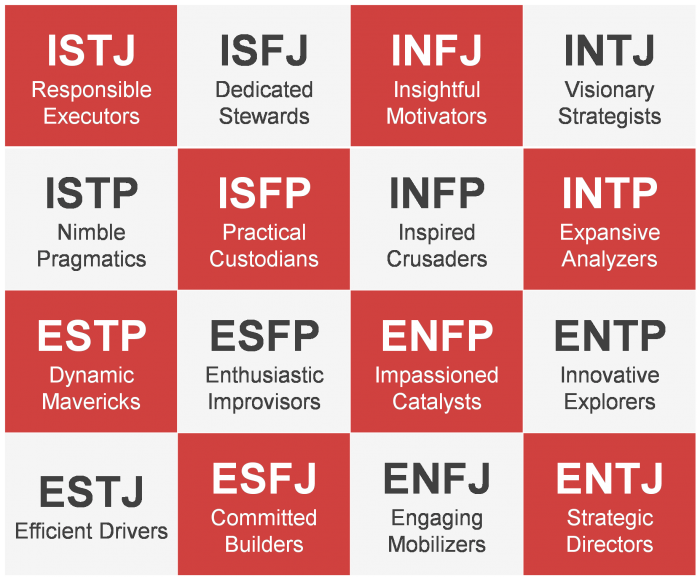

#**Data Preparation: Myers-Briggs Type Indicator**

##**Uploading .csv file from Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import re

#plotting
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

path = "/content/drive/MyDrive/1 MSU - IIT/7 Fourth Year First Sem/Emerging Technologies in Computer Engineering/Project Dataset/mbti_1.csv"
data = pd.read_csv(path)

#Dataset is now stored in a Pandas Dataframe
data
# data.columns

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...
...,...,...
8670,ISFP,'https://www.youtube.com/watch?v=t8edHB_h908||...
8671,ENFP,'So...if this thread already exists someplace ...
8672,INTP,'So many questions when i do these things. I ...
8673,INFP,'I am very conflicted right now when it comes ...


##**Getting a sample**

In [ ]:
data.sample(5)

,type,posts
2826,INFJ,'You're in my head...and I like it! :wink:|||1...
2221,INTJ,"'I love traveling, experiencing the culture, h..."
284,ENTJ,'Hi ! There is some material in your answer to...
2227,ENFP,"'You rang, yes, hello, I am a feeling atheist...."
1064,INFP,'I love it when I'm at the library reading a b...


##**Dataset Dimension (Rows x Columns)**

In [ ]:
data.shape

(8675, 2)

##**Data types of Dataset**

In [ ]:
data.dtypes

type     object
posts    object
dtype: object

##**Descriptive Statistics Summary**

In [ ]:
pd.set_option('precision', 2) 
print(data.describe())

        type                                              posts
count   8675                                               8675
unique    16                                               8675
top     INFP  'id say no for the lack of avi|||kaiten yaki l...
freq    1832                                                  1


##**List of posts (Splitting from '|||')**

In [ ]:
[p.split('|||') for p in data.head(2).posts.values]

[["'http://www.youtube.com/watch?v=qsXHcwe3krw",
  'http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg',
  'enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks',
  'What has been the most life-changing experience in your life?',
  'http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.',
  'May the PerC Experience immerse you.',
  'The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206',
  "Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...",
  '84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04

## Types Indexing

In [ ]:
types = np.unique(data.type.values)

def get_type_index(string):
    return list(types).index(string)

data['type_index'] = data['type'].apply(get_type_index)

data

,type,posts,type_index
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,8
1,ENTP,'I'm finding the lack of me in these posts ver...,3
2,INTP,'Good one _____ https://www.youtube.com/wat...,11
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",10
4,ENTJ,'You're fired.|||That's another silly misconce...,2
...,...,...,...
8670,ISFP,'https://www.youtube.com/watch?v=t8edHB_h908||...,13
8671,ENFP,'So...if this thread already exists someplace ...,1
8672,INTP,'So many questions when i do these things. I ...,11
8673,INFP,'I am very conflicted right now when it comes ...,9


##**Variance of Word Counds**

In [ ]:
# Courtesy DLAO
def var_row(row):
    l = []
    for i in row.split('|||'):
        l.append(len(i.split()))
    return np.var(l)

data['variance_of_word_counts'] = data['posts'].apply(lambda x: var_row(x))
data.head(10)

,type,posts,type_index,variance_of_word_counts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,8,135.29
1,ENTP,'I'm finding the lack of me in these posts ver...,3,187.48
2,INTP,'Good one _____ https://www.youtube.com/wat...,11,180.69
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",10,181.83
4,ENTJ,'You're fired.|||That's another silly misconce...,2,196.46
5,INTJ,'18/37 @.@|||Science is not perfect. No scien...,10,97.72
6,INFJ,"'No, I can't draw on my own nails (haha). Thos...",8,151.37
7,INTJ,'I tend to build up a collection of things on ...,10,174.77
8,INFJ,"I'm not sure, that's a good question. The dist...",8,207.11
9,INTP,'https://www.youtube.com/watch?v=w8-egj0y8Qs||...,11,145.67


# Counting URLs

In [ ]:
data['split_posts'] = [p.split('|||') for p in data.posts.values]
http_per_comment = []
links = [[] for _ in range(len(data))]

for x in range(0, len(data['split_posts'])):
  http_count = 0
  links_punc_count = 0
  for y in range(0, len(data['split_posts'][x])):
    http_count += data['split_posts'][x][y].count('http')
    if "http" in data['split_posts'][x][y]:
      links[x].append(data['split_posts'][x][y].split())
    # links_punc_count += 
    if y == len(data['split_posts'][x]) - 1:
      http_per_comment.append(http_count)
      # links_contain_punc.append(links_punc_count)
len(links)

8675

In [ ]:
data['http_per person'] = http_per_comment
data

,type,posts,type_index,variance_of_word_counts,split_posts,http_per person
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,8,135.29,"['http://www.youtube.com/watch?v=qsXHcwe3krw, ...",24
1,ENTP,'I'm finding the lack of me in these posts ver...,3,187.48,['I'm finding the lack of me in these posts ve...,10
2,INTP,'Good one _____ https://www.youtube.com/wat...,11,180.69,['Good one _____ https://www.youtube.com/wa...,5
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",10,181.83,"['Dear INTP, I enjoyed our conversation the ...",2
4,ENTJ,'You're fired.|||That's another silly misconce...,2,196.46,"['You're fired., That's another silly misconce...",6
...,...,...,...,...,...,...
8670,ISFP,'https://www.youtube.com/watch?v=t8edHB_h908||...,13,125.33,"['https://www.youtube.com/watch?v=t8edHB_h908,...",7
8671,ENFP,'So...if this thread already exists someplace ...,1,125.61,['So...if this thread already exists someplace...,2
8672,INTP,'So many questions when i do these things. I ...,11,169.78,['So many questions when i do these things. I...,2
8673,INFP,'I am very conflicted right now when it comes ...,9,57.03,['I am very conflicted right now when it comes...,0


##Counting URLs, question marks, and exclamation marks, words, ellipsis, etc.

In [ ]:
question_per_comment = []
excl_per_comment = []
ellipsis_per_comment = []
comma_per_comment = []
words_per_comment = []
self_per_comment = []


for x in range(0, len(data['split_posts'])):
  question_count = 0
  excl_count = 0
  ellipsis_count = 0
  comma_count = 0
  words_count = 0
  self_count = 0

  
  for y in range(0, len(data['split_posts'][x])):
    question_count += data['split_posts'][x][y].count('?')
    excl_count += data['split_posts'][x][y].count('!')
    ellipsis_count += data['split_posts'][x][y].count('...', 0, -2)
    comma_count += data['split_posts'][x][y].count(',')
    words_count += len(data['split_posts'][x][y].split())
    self_count += data['split_posts'][x][y].count('i ')
    self_count += data['split_posts'][x][y].count('I ')
    self_count += data['split_posts'][x][y].count("I'd ")
    self_count += data['split_posts'][x][y].count("i'd ")
    self_count += data['split_posts'][x][y].count("I'm ")
    self_count += data['split_posts'][x][y].count("i'm ")
    self_count += data['split_posts'][x][y].count(' me ')
    self_count += data['split_posts'][x][y].count('mine')
    self_count += data['split_posts'][x][y].count('myself')



    # if y == len(data['split_posts'][x]) - 1:
  question_per_comment.append(question_count)
  excl_per_comment.append(excl_count)
  ellipsis_per_comment.append(ellipsis_count)
  comma_per_comment.append(comma_count)
  words_per_comment.append(words_count)
  self_per_comment.append(self_count)


### Exclude "?" found in URLs

In [ ]:
links_contain_question = []

for x in range(0,len(links)):
  count_link_question = 0
  for y in range(0,len(links[x])):
    for z in range(0,len(links[x][y])):
      if "http" in links[x][y][z]:
        if "?" in links[x][y][z]:
          count_link_question += 1
  links_contain_question.append(count_link_question)
  
question_in_url = np.array(links_contain_question)
question_in_comment = np.array(question_per_comment)
final_question = question_in_comment - question_in_url
final_question

array([2, 4, 9, ..., 7, 9, 3])

In [ ]:

data['question_per_person'] = final_question
data['exclamation_per_person'] = excl_per_comment
data['ellipsis_per_person'] = ellipsis_per_comment
data['comma_per_person'] = comma_per_comment
data['words_per_person'] = words_per_comment
data['self_per_person'] = self_per_comment
data = data.drop(columns = 'posts')
data = data[['type', 'type_index', 'split_posts','variance_of_word_counts', 'http_per person',
       'question_per_person', 'exclamation_per_person', 'ellipsis_per_person',
       'comma_per_person', 'words_per_person','self_per_person']]
data

,type,type_index,split_posts,variance_of_word_counts,http_per person,question_per_person,exclamation_per_person,ellipsis_per_person,comma_per_person,words_per_person,self_per_person
0,INFJ,8,"['http://www.youtube.com/watch?v=qsXHcwe3krw, ...",135.29,24,2,3,7,16,605,18
1,ENTP,3,['I'm finding the lack of me in these posts ve...,187.48,10,4,0,0,16,1219,91
2,INTP,11,['Good one _____ https://www.youtube.com/wa...,180.69,5,9,4,0,29,885,37
3,INTJ,10,"['Dear INTP, I enjoyed our conversation the ...",181.83,2,9,3,3,51,1113,73
4,ENTJ,2,"['You're fired., That's another silly misconce...",196.46,6,8,1,1,30,1016,35
...,...,...,...,...,...,...,...,...,...,...,...
8670,ISFP,13,"['https://www.youtube.com/watch?v=t8edHB_h908,...",125.33,7,5,6,1,24,845,46
8671,ENFP,1,['So...if this thread already exists someplace...,125.61,2,10,33,9,44,1358,106
8672,INTP,11,['So many questions when i do these things. I...,169.78,2,7,1,2,48,997,40
8673,INFP,9,['I am very conflicted right now when it comes...,57.03,0,9,3,2,102,1754,145


###**Testing count() method parameters etc.**

In [ ]:
test = "...Hello aw aw... aw aw ..."
x = test.count('...', 0,-2)
# len(test)
type(x)

# split_data[8671][0].count('...',0,-2)
# split_data[8671][0] = 0
# split_data[8671]
# data['ellipsis_person'][0] = 99
# data['ellipsis_person']

# lista = [1,2,3]
# range(len(lista))
# aw = "hello hello hello"
# len(aw.split())

# data.words_per_comment[0]
t = data['type']
print(t[0])
print(t[1])
print(t[2])
print(t[3])


sentence = [["He doesn't want to go on the trip without me, AAA so me staying behind wouldn't AAA be an option for him.", "I'm still completely in AWE AAA and I'm AMAZED that he doesn't think twice AAA about leaving one of them and how that will make them feel."],
            ["My husband works an extra job AAA each year to pay for a Disney World trip for the two of us", "He said that it's not like he's AAA asking me to do the 90 percent and he is only willing to do 10"]]
for x in range(len(sentence)):
  count = 0
  for y in range(len(sentence[x])):
    count += sentence[x][y].count('AAA')
    if y == (len(sentence[x]) - 1):
      print(count)



INFJ
ENTP
INTP
INTJ
4
2


###**Verifying the data above:**

In [ ]:
# Respondent 8671 is said to have used the exclamation point 33 times, let's see
data.describe()
data['split_posts'][8674]

["'It has been too long since I have been on personalitycafe - although it doesn't seem to have changed one bit - but I must say it is good to be back somewhere like this. Usually I turn to Doctor Who...",
 'http://www.youtube.com/watch?v=6EEW-9NDM5k',
 'Overwhelmed by the world around me.',
 'In one dream I have had I was being chased by a large shadowy creature, with someone else who I felt I had to save above all else. The dream ended after she reached safety, but as for what happened...',
 "Well now My Avatar is a Doctor Who Clockwork Creature. I always liked this monster because It is just a worker trying to do it's job, kind of :3",
 '1st - Thanks for your reply, I appreciate all the help I can get. 2nd - I think everyone has the right to their opinion :) (however too many people abuse that right :P )',
 'Yea, Not Doing the Iron Man Thing xD  Thanks for all the advice everyone :)',
 "Thanks :)  I think I needed some humour. I might show them this (maybe).   I know they won't do a

##**Extracting Statement Sentiment Using TextBlob**

In [ ]:
from textblob import TextBlob
posts = [x for x in data['split_posts'][1]]
tokenize = [TextBlob(x) for x in posts]
sentiments = [x.sentiment for x in tokenize]
for x in range(len(sentiments)):
  print(f"{sentiments[x]} \t\t\t {data['split_posts'][1][x]} ")


Sentiment(polarity=-0.13, subjectivity=0.78) 			 'I'm finding the lack of me in these posts very alarming. 
Sentiment(polarity=-0.1, subjectivity=0.605) 			 Sex can be boring if it's in the same position often. For example me and my girlfriend are currently in an environment where we have to creatively use cowgirl and missionary. There isn't enough... 
Sentiment(polarity=-0.13181818181818183, subjectivity=0.42727272727272725) 			 Giving new meaning to 'Game' theory. 
Sentiment(polarity=0.4666666666666666, subjectivity=0.5) 			 Hello *ENTP Grin*  That's all it takes. Than we converse and they do most of the flirting while I acknowledge their presence and return their words with smooth wordplay and more cheeky grins. 
Sentiment(polarity=0.0, subjectivity=0.0) 			 This + Lack of Balance and Hand Eye Coordination. 
Sentiment(polarity=0.175, subjectivity=0.45) 			 Real IQ test I score 127. Internet IQ tests are funny. I score 140s or higher.  Now, like the former responses of this thread I 

In [ ]:

negative_per_person = []
positive_per_person = []

for x in range(0, len(data['split_posts'])):
  pos_correct = 0
  neg_correct = 0
  for line in data['split_posts'][x]:
    analysis = TextBlob(line)

    if analysis.sentiment.polarity >= 0.01:   # Changing this value close to zero improves accuracy
        if analysis.sentiment.polarity > 0:
            pos_correct += 1

  for line in data['split_posts'][x]:
      analysis = TextBlob(line)

      if analysis.sentiment.polarity <= -0.01:  # Changing this value close to zero improves accuracy
        if analysis.sentiment.polarity <= 0:
            neg_correct += 1

  negative_per_person.append(neg_correct)
  positive_per_person.append(pos_correct)


print(f"Negative: {negative_per_person}\nPositive: {positive_per_person}")

Negative: [6, 11, 10, 8, 12, 13, 10, 11, 7, 11, 17, 8, 10, 17, 10, 13, 7, 8, 7, 10, 11, 11, 14, 3, 11, 11, 6, 7, 6, 19, 13, 19, 7, 9, 7, 6, 9, 18, 14, 12, 7, 16, 19, 7, 8, 12, 16, 12, 15, 12, 9, 9, 4, 12, 8, 7, 7, 12, 13, 12, 7, 13, 16, 9, 4, 12, 2, 5, 10, 7, 9, 10, 3, 7, 12, 8, 14, 7, 14, 6, 12, 13, 13, 13, 14, 11, 16, 6, 10, 14, 9, 10, 6, 3, 13, 9, 7, 11, 10, 10, 6, 14, 25, 6, 17, 7, 5, 11, 13, 6, 14, 16, 12, 13, 16, 10, 10, 19, 13, 10, 10, 5, 15, 9, 9, 10, 11, 10, 16, 11, 7, 16, 17, 11, 12, 9, 12, 12, 12, 18, 9, 13, 10, 9, 12, 10, 5, 9, 19, 6, 8, 4, 8, 15, 5, 1, 8, 6, 10, 7, 14, 16, 19, 12, 4, 7, 6, 7, 18, 11, 5, 11, 5, 13, 9, 15, 11, 9, 16, 10, 13, 7, 10, 5, 11, 12, 3, 7, 17, 14, 13, 10, 11, 8, 8, 11, 7, 6, 18, 16, 14, 7, 7, 11, 4, 11, 18, 12, 13, 13, 18, 5, 8, 3, 10, 10, 15, 11, 13, 5, 7, 12, 6, 8, 8, 9, 11, 9, 3, 6, 10, 5, 12, 12, 8, 15, 10, 9, 5, 7, 9, 14, 11, 10, 13, 16, 6, 18, 6, 9, 7, 8, 10, 14, 15, 12, 19, 6, 19, 10, 15, 13, 11, 13, 11, 11, 17, 14, 7, 11, 9, 19, 8, 14, 14, 2

In [ ]:
data['negative_per_person'] = negative_per_person
data['positive_per_person'] = positive_per_person
data

,type,type_index,split_posts,variance_of_word_counts,http_per person,question_per_person,exclamation_per_person,ellipsis_per_person,comma_per_person,words_per_person,self_per_person,negative_per_person,positive_per_person
0,INFJ,8,"['http://www.youtube.com/watch?v=qsXHcwe3krw, ...",135.29,24,2,3,7,16,605,18,6,22
1,ENTP,3,['I'm finding the lack of me in these posts ve...,187.48,10,4,0,0,16,1219,91,11,31
2,INTP,11,['Good one _____ https://www.youtube.com/wa...,180.69,5,9,4,0,29,885,37,10,24
3,INTJ,10,"['Dear INTP, I enjoyed our conversation the ...",181.83,2,9,3,3,51,1113,73,8,29
4,ENTJ,2,"['You're fired., That's another silly misconce...",196.46,6,8,1,1,30,1016,35,12,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8670,ISFP,13,"['https://www.youtube.com/watch?v=t8edHB_h908,...",125.33,7,5,6,1,24,845,46,6,24
8671,ENFP,1,['So...if this thread already exists someplace...,125.61,2,10,33,9,44,1358,106,8,36
8672,INTP,11,['So many questions when i do these things. I...,169.78,2,7,1,2,48,997,40,11,25
8673,INFP,9,['I am very conflicted right now when it comes...,57.03,0,9,3,2,102,1754,145,14,31


##**Distribution of the Personality Types**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


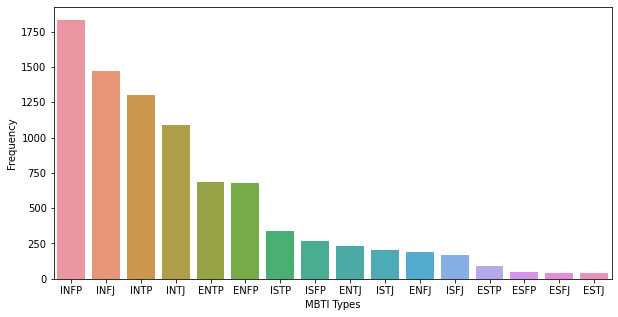

In [ ]:
mbti_types = data['type'].value_counts()
plt.figure(figsize = (10, 5))
sns.barplot(mbti_types.index, mbti_types.values)
plt.xlabel('MBTI Types')
plt.ylabel('Frequency')
plt.show()

##**Translating MBTI types to quantitative data**

In [ ]:
# Courtesy Jordi Ruspira
map1 = {"I": 0, "E": 1}
map2 = {"N": 0, "S": 1}
map3 = {"T": 0, "F": 1}
map4 = {"J": 0, "P": 1}
data['I-E'] = data['type'].astype(str).str[0]
data['I-E'] = data['I-E'].map(map1)
data['N-S'] = data['type'].astype(str).str[1]
data['N-S'] = data['N-S'].map(map2)
data['T-F'] = data['type'].astype(str).str[2]
data['T-F'] = data['T-F'].map(map3)
data['J-P'] = data['type'].astype(str).str[3]
data['J-P'] = data['J-P'].map(map4)
data

,type,type_index,split_posts,variance_of_word_counts,http_per person,question_per_person,exclamation_per_person,ellipsis_per_person,comma_per_person,words_per_person,self_per_person,negative_per_person,positive_per_person,I-E,N-S,T-F,J-P
0,INFJ,8,"['http://www.youtube.com/watch?v=qsXHcwe3krw, ...",135.29,24,2,3,7,16,605,18,6,22,0,0,1,0
1,ENTP,3,['I'm finding the lack of me in these posts ve...,187.48,10,4,0,0,16,1219,91,11,31,1,0,0,1
2,INTP,11,['Good one _____ https://www.youtube.com/wa...,180.69,5,9,4,0,29,885,37,10,24,0,0,0,1
3,INTJ,10,"['Dear INTP, I enjoyed our conversation the ...",181.83,2,9,3,3,51,1113,73,8,29,0,0,0,0
4,ENTJ,2,"['You're fired., That's another silly misconce...",196.46,6,8,1,1,30,1016,35,12,19,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8670,ISFP,13,"['https://www.youtube.com/watch?v=t8edHB_h908,...",125.33,7,5,6,1,24,845,46,6,24,0,1,1,1
8671,ENFP,1,['So...if this thread already exists someplace...,125.61,2,10,33,9,44,1358,106,8,36,1,0,1,1
8672,INTP,11,['So many questions when i do these things. I...,169.78,2,7,1,2,48,997,40,11,25,0,0,0,1
8673,INFP,9,['I am very conflicted right now when it comes...,57.03,0,9,3,2,102,1754,145,14,31,0,0,1,1


In [ ]:
print ("Introversion (I) /  Extroversion (E):\t", data['I-E'].value_counts()[0], " / ", data['I-E'].value_counts()[1])
print ("Intuition (N) – Sensing (S):\t\t", data['N-S'].value_counts()[0], " / ", data['N-S'].value_counts()[1])
print ("Thinking (T) – Feeling (F):\t\t", data['T-F'].value_counts()[0], " / ", data['T-F'].value_counts()[1])
print ("Judging (J) – Perceiving (P):\t\t", data['J-P'].value_counts()[0], " / ", data['J-P'].value_counts()[1])

Introversion (I) /  Extroversion (E):	 6676  /  1999
Intuition (N) – Sensing (S):		 7478  /  1197
Thinking (T) – Feeling (F):		 3981  /  4694
Judging (J) – Perceiving (P):		 3434  /  5241


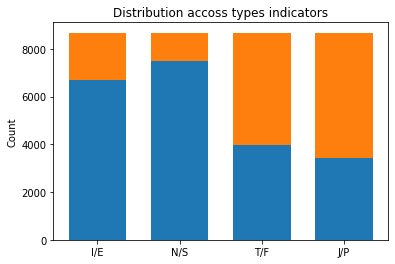

In [ ]:
N = 4
but = (data['I-E'].value_counts()[0], data['N-S'].value_counts()[0], data['T-F'].value_counts()[0], data['J-P'].value_counts()[0])
top = (data['I-E'].value_counts()[1], data['N-S'].value_counts()[1], data['T-F'].value_counts()[1], data['J-P'].value_counts()[1])

ind = np.arange(N)    # the x locations for the groups
width = 0.7      # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, but, width)
p2 = plt.bar(ind, top, width, bottom=but)

plt.ylabel('Count')
plt.title('Distribution accoss types indicators')
plt.xticks(ind, ('I/E',  'N/S', 'T/F', 'J/P',))

plt.show()
            # {"I": 0, "E": 1}
            # {"N": 0, "S": 1}
            # {"T": 0, "F": 1}
            # {"J": 0, "P": 1}

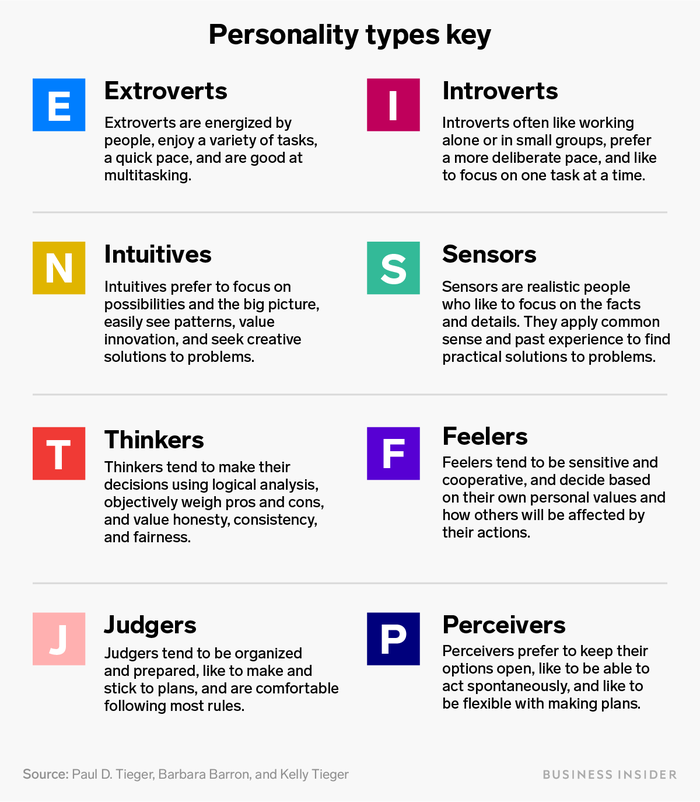

##Violin Plot

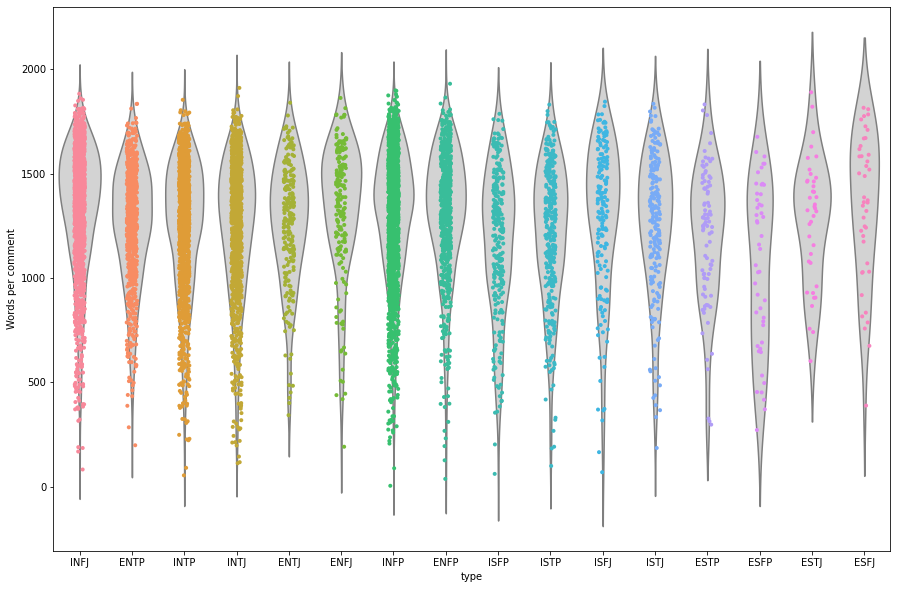

In [ ]:
plt.figure(figsize=(15,10))
sns.violinplot(x='type', y="words_per_person", data=data, inner=None, color='lightgray')
sns.stripplot(x='type', y="words_per_person", data=data, size=4, jitter=True)
plt.ylabel('Words per comment')
plt.show()

In [ ]:
data

,type,type_index,split_posts,variance_of_word_counts,http_per person,question_per_person,exclamation_per_person,ellipsis_per_person,comma_per_person,words_per_person,self_per_person,negative_per_person,positive_per_person,I-E,N-S,T-F,J-P
0,INFJ,8,"['http://www.youtube.com/watch?v=qsXHcwe3krw, ...",135.29,24,2,3,7,16,605,18,6,22,0,0,1,0
1,ENTP,3,['I'm finding the lack of me in these posts ve...,187.48,10,4,0,0,16,1219,91,11,31,1,0,0,1
2,INTP,11,['Good one _____ https://www.youtube.com/wa...,180.69,5,9,4,0,29,885,37,10,24,0,0,0,1
3,INTJ,10,"['Dear INTP, I enjoyed our conversation the ...",181.83,2,9,3,3,51,1113,73,8,29,0,0,0,0
4,ENTJ,2,"['You're fired., That's another silly misconce...",196.46,6,8,1,1,30,1016,35,12,19,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8670,ISFP,13,"['https://www.youtube.com/watch?v=t8edHB_h908,...",125.33,7,5,6,1,24,845,46,6,24,0,1,1,1
8671,ENFP,1,['So...if this thread already exists someplace...,125.61,2,10,33,9,44,1358,106,8,36,1,0,1,1
8672,INTP,11,['So many questions when i do these things. I...,169.78,2,7,1,2,48,997,40,11,25,0,0,0,1
8673,INFP,9,['I am very conflicted right now when it comes...,57.03,0,9,3,2,102,1754,145,14,31,0,0,1,1


##**Word Cloud**

In [ ]:
pip install -U scipy==1.2.0

     |████████████████████████████████| 26.6 MB 948 kB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jax 0.2.25 requires scipy>=1.2.1, but you have scipy 1.2.0 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
# Courtesy Dlao
from scipy.misc import imread
from wordcloud import WordCloud, STOPWORDS

fig, ax = plt.subplots(len(data['type'].unique()), sharex=True, figsize=(15,10*len(data['type'].unique())))

k = 0
stop_words = ["youtube"]
for i in data['type'].unique():
    data_wc = data[data['type'] == i]
    wordcloud = WordCloud(stopwords = stop_words, background_color = "white").generate(data_wc['split_posts'].to_string())
    ax[k].imshow(wordcloud)
    ax[k].set_title(i)
    ax[k].axis("off")
    k+=1

ImportError: ignored

##**Pearson Correlation**

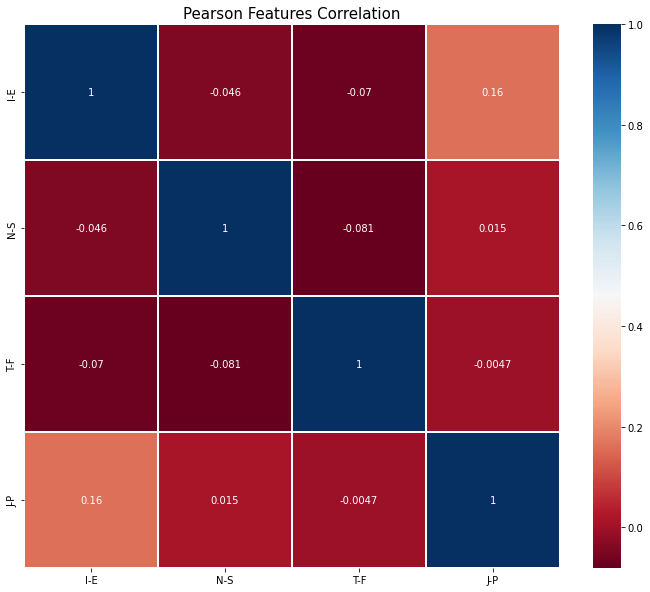

In [ ]:
cmap = plt.cm.RdBu
corr = data[['I-E','N-S','T-F','J-P']].corr()
plt.figure(figsize=(12,10))
plt.title('Pearson Features Correlation', size=15)
sns.heatmap(corr, cmap=cmap,  annot=True, linewidths=1)

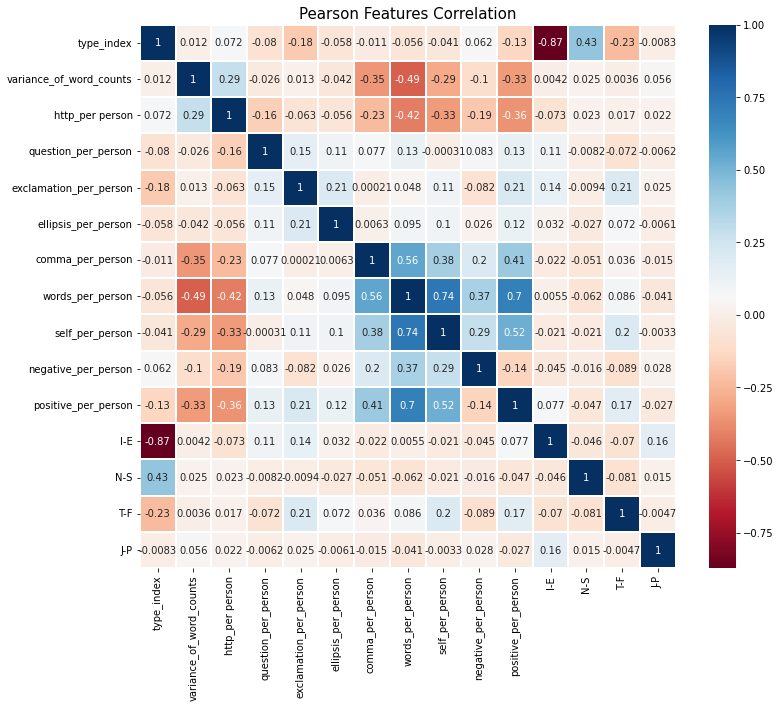

In [ ]:
cmap = plt.cm.RdBu
corr = data[['type_index','variance_of_word_counts',
       'http_per person', 'question_per_person', 'exclamation_per_person',
       'ellipsis_per_person', 'comma_per_person', 'words_per_person',
       'self_per_person', 'negative_per_person', 'positive_per_person', 'I-E',
       'N-S', 'T-F', 'J-P']].corr()
plt.figure(figsize=(12,10))
plt.title('Pearson Features Correlation', size=15)
sns.heatmap(corr, cmap=cmap,  annot=True, linewidths=1)

In [ ]:
data.columns

Index(['type', 'type_index', 'split_posts', 'variance_of_word_counts',
       'http_per person', 'question_per_person', 'exclamation_per_person',
       'ellipsis_per_person', 'comma_per_person', 'words_per_person',
       'self_per_person', 'negative_per_person', 'positive_per_person', 'I-E',
       'N-S', 'T-F', 'J-P'],
      dtype='object')

#Building the Machine Learning Models

Area under the curve rating
0.5 = This suggests no discrimination, so we might as well flip a coin.
0.5-0.7 = We consider this poor discrimination, not much better than a coin toss.
0.7-0.8 = Acceptable discrimination
0.8-0.9= Excellent discrimination
>0.9 = Outstanding discrimination"

In [ ]:
pip install scikit-plot

In [ ]:
import sklearn
sklearn.__version__

from sklearn.metrics import classification_report
import scikitplot as skplt
from sklearn.preprocessing import Normalizer
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

sklearn.__version__


'1.0.1'

In [ ]:
# Classification Report with Nested K-Fold
def classification_report_with_accuracy_score(y_true, y_pred):
  print(classification_report(y_true, y_pred))
  return accuracy_score(y_true, y_pred)

# Setting Independent and Dependent Variables

In [ ]:
# X = data.drop(['type', 'split_posts', 'I-E'], axis = 1)
# Y = data['I-E']

# X2 = data.drop(['type', 'split_posts', 'N-S'], axis = 1)
# Y2 = data['N-S']

# X3 = data.drop(['type', 'split_posts', 'T-F'], axis = 1)
# Y3 = data['T-F']

# X4 = data.drop(['type', 'split_posts', 'J-P'], axis = 1)
# Y4 = data['J-P']

X = data.drop(['type', 'type_index', 'split_posts', 'I-E', 'N-S', 'T-F', 'J-P'], axis = 1)
Y = data['I-E']
Y2 = data['N-S']
Y3 = data['T-F']
Y4 = data['J-P']

print(X.shape)
print(Y.shape)

(8675, 10)
(8675,)


## Train and Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4, random_state=7)
X_train, X_test, Y2_train, Y2_test = train_test_split(X, Y2, test_size = 0.4, random_state=7)
X_train, X_test, Y3_train, Y3_test = train_test_split(X, Y3, test_size = 0.4, random_state=7)
X_train, X_test, Y4_train, Y4_test = train_test_split(X, Y4, test_size = 0.4, random_state=7)



In [ ]:
print(X_train.head)
print(X_test.head)
print(Y_train.head)
print(Y_test.head)

<bound method NDFrame.head of       variance_of_word_counts  ...  positive_per_person
2992                   156.30  ...                   22
1895                   179.88  ...                   32
1542                    58.16  ...                   32
1152                   143.52  ...                   15
6656                   198.12  ...                   24
...                       ...  ...                  ...
1372                   158.49  ...                   18
919                     23.82  ...                   35
4307                   174.20  ...                   24
5699                   124.84  ...                   27
537                    135.84  ...                   19

[5205 rows x 10 columns]>
<bound method NDFrame.head of       variance_of_word_counts  ...  positive_per_person
8566                   166.50  ...                    8
4738                   225.64  ...                   17
906                     82.35  ...                   19
6020             

## K-Fold Cross Validation

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kf = KFold(n_splits=10, shuffle=False, random_state=None)

## Scaling

In [ ]:
# scaling_X = StandardScaler()
scaling_X = Normalizer()


standard_X_train = scaling_X.fit_transform(X_train)
standard_X_test = scaling_X.fit_transform(X_test)


In [ ]:
print(standard_X_train,'\n\n')
print(standard_X_test)

[[0.12454483 0.00159364 0.0039841  ... 0.09163427 0.01354594 0.01753003]
 [0.14588801 0.00648818 0.         ... 0.072181   0.00648818 0.02595272]
 [0.03435532 0.         0.0047255  ... 0.04666429 0.00708825 0.01890199]
 ...
 [0.12596426 0.01446239 0.00578496 ... 0.05568021 0.00940056 0.01735487]
 [0.09376835 0.00150217 0.00375543 ... 0.05858475 0.00600869 0.02027934]
 [0.23283274 0.00171402 0.00514207 ... 0.06170479 0.00171402 0.03256642]] 


[[0.17015937 0.         0.0112416  ... 0.05212014 0.02554909 0.00817571]
 [0.21645903 0.01151166 0.00767444 ... 0.04988384 0.01247096 0.01630818]
 [0.04980651 0.00241915 0.00665267 ... 0.07196983 0.01330535 0.01149098]
 ...
 [0.049315   0.00122073 0.0036622  ... 0.05005013 0.0036622  0.0244147 ]
 [0.07086828 0.0019471  0.00713937 ... 0.0668505  0.00649034 0.02076909]
 [0.07079316 0.00609641 0.00406427 ... 0.05283557 0.00406427 0.02235351]]


## Naive-Bayes with K-Fold


In [ ]:
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
model_naive_bayes = GaussianNB()

### {"I": 0, "E": 1}


In [ ]:
model_naive_bayes.fit(standard_X_train, Y_train)

target_names = ['I', 'E']
print(f"I-E Test Accuracy @ No folds: {(accuracy_score(Y_test, model_naive_bayes.predict(standard_X_test)))*100}")
print(f'Area under the curve: ',cross_val_score(model_naive_bayes, standard_X_test, Y_test, scoring = 'roc_auc').mean())
print(f'Test Classification Report: \n{classification_report(Y_test, model_naive_bayes.predict(standard_X_test), target_names = target_names)}')

print(f"I-E Train Accuracy @ No folds: {(accuracy_score(Y_train, model_naive_bayes.predict(standard_X_train)))*100}")
print(f'Area under the curve: ',cross_val_score(model_naive_bayes, standard_X_train, Y_train, scoring = 'roc_auc').mean())
print(f'Train Classification Report: \n{classification_report(Y_train, model_naive_bayes.predict(standard_X_train), target_names = target_names)}')

for i in range(2,103,10):
  result = cross_val_score(model_naive_bayes, X, Y, cv = i, scoring = 'accuracy')
  print(f'I-E Accuracy @ {i} folds: {result.mean()*100.0, result.std()*100.0}', cross_val_score(model_naive_bayes, X, Y, scoring = 'roc_auc').mean())





I-E Test Accuracy @ No folds: 69.19308357348703
Area under the curve:  0.6121309359431104
Test Classification Report: 
              precision    recall  f1-score   support

           I       0.81      0.79      0.80      2667
           E       0.35      0.38      0.36       803

    accuracy                           0.69      3470
   macro avg       0.58      0.58      0.58      3470
weighted avg       0.70      0.69      0.70      3470

I-E Train Accuracy @ No folds: 69.02977905859751
Area under the curve:  0.5912965216208657
Train Classification Report: 
              precision    recall  f1-score   support

           I       0.80      0.79      0.80      4009
           E       0.34      0.36      0.35      1196

    accuracy                           0.69      5205
   macro avg       0.57      0.57      0.57      5205
weighted avg       0.70      0.69      0.69      5205

I-E Accuracy @ 2 folds: (75.00869835322872, 0.4582142591761651) 0.6047410182085773
I-E Accuracy @ 12 folds

###{"N": 0, "S": 1}


In [ ]:
model_naive_bayes.fit(standard_X_train, Y2_train)

target_names = ['N', 'S']
print(f"N-S Test Accuracy @ No folds: {(accuracy_score(Y2_test, model_naive_bayes.predict(standard_X_test)))*100}")
print(f'Area under the curve: ',cross_val_score(model_naive_bayes, standard_X_test, Y2_test, scoring = 'roc_auc').mean())
print(f'Test Classification Report: \n{classification_report(Y2_test, model_naive_bayes.predict(standard_X_test), target_names = target_names)}')

print(f"N-S Train Accuracy @ No folds: {(accuracy_score(Y2_train, model_naive_bayes.predict(standard_X_train)))*100}")
print(f'Area under the curve: ',cross_val_score(model_naive_bayes, standard_X_train, Y2_train, scoring = 'roc_auc').mean())
print(f'Train Classification Report: \n{classification_report(Y2_train, model_naive_bayes.predict(standard_X_train), target_names = target_names)}')

for i in range(2,103,10):
  result = cross_val_score(model_naive_bayes, X, Y2, cv = i, scoring = 'accuracy')
  print(f'N-S Accuracy @ {i} folds: {result.mean()*100.0, result.std()*100.0}',cross_val_score(model_naive_bayes, X, Y2, scoring = 'roc_auc').mean())



N-S Test Accuracy @ No folds: 84.03458213256484
Area under the curve:  0.5531454015994057
Test Classification Report: 
              precision    recall  f1-score   support

           N       0.87      0.96      0.91      2998
           S       0.20      0.06      0.09       472

    accuracy                           0.84      3470
   macro avg       0.53      0.51      0.50      3470
weighted avg       0.78      0.84      0.80      3470

N-S Train Accuracy @ No folds: 84.01536983669548
Area under the curve:  0.5497352216748769
Train Classification Report: 
              precision    recall  f1-score   support

           N       0.86      0.97      0.91      4480
           S       0.22      0.06      0.09       725

    accuracy                           0.84      5205
   macro avg       0.54      0.51      0.50      5205
weighted avg       0.77      0.84      0.80      5205

N-S Accuracy @ 2 folds: (82.91652727509108, 0.8741114152478524) 0.5447387141424959
N-S Accuracy @ 12 folds

###{"T": 0, "F": 1}

In [ ]:
model_naive_bayes.fit(standard_X_train, Y3_train)

target_names = ['T', 'F']
print(f"T-F Test Accuracy @ No folds: {(accuracy_score(Y3_test, model_naive_bayes.predict(standard_X_test)))*100}")
print(f'Area under the curve: ',cross_val_score(model_naive_bayes, standard_X_test, Y3_test, scoring = 'roc_auc').mean())
print(f'Test Classification Report: \n{classification_report(Y3_test, model_naive_bayes.predict(standard_X_test), target_names = target_names)}')

print(f"T-F Train Accuracy @ No folds: {(accuracy_score(Y3_train, model_naive_bayes.predict(standard_X_train)))*100}")
print(f'Area under the curve: ',cross_val_score(model_naive_bayes, standard_X_train, Y3_train, scoring = 'roc_auc').mean())
print(f'Train Classification Report: \n{classification_report(Y3_train, model_naive_bayes.predict(standard_X_train), target_names = target_names)}')

for i in range(2,103,10):
  result = cross_val_score(model_naive_bayes, X, Y3, cv = i, scoring = 'accuracy')
  print(f'T-F Accuracy @ {i} folds: {result.mean()*100.0, result.std()*100.0}',cross_val_score(model_naive_bayes, X, Y3, scoring = 'roc_auc').mean())



T-F Test Accuracy @ No folds: 64.49567723342939
Area under the curve:  0.6627896697625324
Test Classification Report: 
              precision    recall  f1-score   support

           T       0.61      0.62      0.62      1587
           F       0.68      0.67      0.67      1883

    accuracy                           0.64      3470
   macro avg       0.64      0.64      0.64      3470
weighted avg       0.65      0.64      0.65      3470

T-F Train Accuracy @ No folds: 63.22766570605187
Area under the curve:  0.663941584447576
Train Classification Report: 
              precision    recall  f1-score   support

           T       0.60      0.62      0.61      2394
           F       0.67      0.64      0.65      2811

    accuracy                           0.63      5205
   macro avg       0.63      0.63      0.63      5205
weighted avg       0.63      0.63      0.63      5205

T-F Accuracy @ 2 folds: (61.91358136901503, 0.3183762053451278) 0.6650462407021218
T-F Accuracy @ 12 folds:

###{"J": 0, "P": 1}

In [ ]:
model_naive_bayes.fit(standard_X_train, Y4_train)

target_names = ['J', 'P']
print(f"J-P Test Accuracy @ No folds: {(accuracy_score(Y4_test, model_naive_bayes.predict(standard_X_test)))*100}")
print(f'Area under the curve: ',cross_val_score(model_naive_bayes, standard_X_test, Y4_test, scoring = 'roc_auc').mean())
print(f'Test Classification Report: \n{classification_report(Y4_test, model_naive_bayes.predict(standard_X_test), target_names = target_names)}')

print(f"J-P Train Accuracy @ No folds: {(accuracy_score(Y4_train, model_naive_bayes.predict(standard_X_train)))*100}")
print(f'Area under the curve: ',cross_val_score(model_naive_bayes, standard_X_train, Y4_train, scoring = 'roc_auc').mean())
print(f'Train Classification Report: \n{classification_report(Y4_train, model_naive_bayes.predict(standard_X_train), target_names = target_names)}')

for i in range(2,100,10):
  result = cross_val_score(model_naive_bayes, X, Y4, cv = i, scoring = 'accuracy')
  print(f'J-P Accuracy @ {i} folds: {result.mean()*100.0, result.std()*100.0}',cross_val_score(model_naive_bayes, X, Y4, scoring = 'roc_auc').mean())

J-P Test Accuracy @ No folds: 59.827089337175785
Area under the curve:  0.5361998853537076
Test Classification Report: 
              precision    recall  f1-score   support

           J       0.44      0.07      0.11      1368
           P       0.61      0.94      0.74      2102

    accuracy                           0.60      3470
   macro avg       0.52      0.51      0.43      3470
weighted avg       0.54      0.60      0.49      3470

J-P Train Accuracy @ No folds: 60.384245917387126
Area under the curve:  0.5286649447093016
Train Classification Report: 
              precision    recall  f1-score   support

           J       0.51      0.07      0.12      2066
           P       0.61      0.95      0.74      3139

    accuracy                           0.60      5205
   macro avg       0.56      0.51      0.43      5205
weighted avg       0.57      0.60      0.50      5205

J-P Accuracy @ 2 folds: (56.81860268675734, 1.3783076199062547) 0.5267699385116742
J-P Accuracy @ 12 fol

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model_logistic_regression = LogisticRegression(max_iter=100)

### {"I":0 "E":1}

In [ ]:
model_logistic_regression.fit(standard_X_train, Y_train)

target_names = ['I', 'E']
print(f"I-E Test Accuracy @ No folds: {(accuracy_score(Y_test, model_logistic_regression.predict(standard_X_test)))*100}")
print(f'Area under the curve: ',cross_val_score(model_logistic_regression, standard_X_test, Y_test, scoring = 'roc_auc').mean())
print(f'Test Classification Report: \n{classification_report(Y_test, model_logistic_regression.predict(standard_X_test), target_names = target_names)}')

print(f"I-E Train Accuracy @ No folds: {(accuracy_score(Y_train, model_logistic_regression.predict(standard_X_train)))*100}")
print(f'Area under the curve: ',cross_val_score(model_logistic_regression, standard_X_train, Y_train, scoring = 'roc_auc').mean())
print(f'Train Classification Report: \n{classification_report(Y_train, model_logistic_regression.predict(standard_X_train), target_names = target_names)}')

# for i in range(2,103,10):
result = cross_val_score(model_logistic_regression, X, Y, cv = 10, scoring = 'accuracy')
print(f'\n\nI-E Accuracy @ {10} folds: {result.mean()*100.0, result.std()*100.0}\n\n')

I-E Test Accuracy @ No folds: 76.85878962536023
Area under the curve:  0.5635564775549972
Test Classification Report: 
              precision    recall  f1-score   support

           I       0.77      1.00      0.87      2667
           E       0.00      0.00      0.00       803

    accuracy                           0.77      3470
   macro avg       0.38      0.50      0.43      3470
weighted avg       0.59      0.77      0.67      3470

I-E Train Accuracy @ No folds: 77.02209414024976


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Area under the curve:  0.5957611020401608
Train Classification Report: 
              precision    recall  f1-score   support

           I       0.77      1.00      0.87      4009
           E       0.00      0.00      0.00      1196

    accuracy                           0.77      5205
   macro avg       0.39      0.50      0.44      5205
weighted avg       0.59      0.77      0.67      5205



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logist



I-E Accuracy @ 10 folds: (76.79544113660643, 0.2129476455097644)




/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


### {"N":0 "S":1}

In [ ]:
model_logistic_regression.fit(standard_X_train, Y2_train)
target_names = ['N', 'S']
print(f"N-S Test Accuracy @ No folds: {(accuracy_score(Y2_test, model_logistic_regression.predict(standard_X_test)))*100}")
print(f'Area under the curve: ',cross_val_score(model_logistic_regression, standard_X_test, Y2_test, scoring = 'roc_auc').mean())
print(f'Test Classification Report: \n{classification_report(Y2_test, model_logistic_regression.predict(standard_X_test), target_names = target_names)}')

print(f"N-S Train Accuracy @ No folds: {(accuracy_score(Y2_train, model_logistic_regression.predict(standard_X_train)))*100}")
print(f'Area under the curve: ',cross_val_score(model_logistic_regression, standard_X_train, Y2_train, scoring = 'roc_auc').mean())
print(f'Train Classification Report: \n{classification_report(Y2_train, model_logistic_regression.predict(standard_X_train), target_names = target_names)}')

# for i in range(2,103,10):
result = cross_val_score(model_logistic_regression, X, Y2, cv = 10, scoring = 'accuracy')
print(f'\n\nN-S Accuracy @ {10} folds: {result.mean()*100.0, result.std()*100.0}\n\n')


N-S Test Accuracy @ No folds: 86.39769452449568
Area under the curve:  0.5733161100901651
Test Classification Report: 
              precision    recall  f1-score   support

           N       0.86      1.00      0.93      2998
           S       0.00      0.00      0.00       472

    accuracy                           0.86      3470
   macro avg       0.43      0.50      0.46      3470
weighted avg       0.75      0.86      0.80      3470

N-S Train Accuracy @ No folds: 86.07108549471661


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Area under the curve:  0.5297152093596059
Train Classification Report: 
              precision    recall  f1-score   support

           N       0.86      1.00      0.93      4480
           S       0.00      0.00      0.00       725

    accuracy                           0.86      5205
   macro avg       0.43      0.50      0.46      5205
weighted avg       0.74      0.86      0.80      5205



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logist



N-S Accuracy @ 10 folds: (86.20174445489769, 0.04801584863242166)




/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


### {"T":0 "F":1}

In [ ]:
model_logistic_regression.fit(standard_X_train, Y3_train)
target_names = ['T', 'F']
print(f"T-F Test Accuracy @ No folds: {(accuracy_score(Y3_test, model_logistic_regression.predict(standard_X_test)))*100}")
print(f'Area under the curve: ',cross_val_score(model_logistic_regression, standard_X_test, Y3_test, scoring = 'roc_auc').mean())
print(f'Test Classification Report: \n{classification_report(Y3_test, model_logistic_regression.predict(standard_X_test), target_names = target_names)}')

print(f"T-F Train Accuracy @ No folds: {(accuracy_score(Y3_train, model_logistic_regression.predict(standard_X_train)))*100}")
print(f'Area under the curve: ',cross_val_score(model_logistic_regression, standard_X_train, Y3_train, scoring = 'roc_auc').mean())
print(f'Train Classification Report: \n{classification_report(Y3_train, model_logistic_regression.predict(standard_X_train), target_names = target_names)}')

# for i in range(2,103,10):
result = cross_val_score(model_logistic_regression, X, Y3, cv = 10, scoring = 'accuracy')
print(f'\n\nT-F Accuracy @ {10} folds: {result.mean()*100.0, result.std()*100.0}\n\n')

T-F Test Accuracy @ No folds: 57.03170028818444
Area under the curve:  0.6431959878490827
Test Classification Report: 
              precision    recall  f1-score   support

           T       0.68      0.11      0.20      1587
           F       0.56      0.95      0.71      1883

    accuracy                           0.57      3470
   macro avg       0.62      0.53      0.45      3470
weighted avg       0.62      0.57      0.47      3470

T-F Train Accuracy @ No folds: 56.31123919308357
Area under the curve:  0.6460636968077357
Train Classification Report: 
              precision    recall  f1-score   support

           T       0.65      0.11      0.18      2394
           F       0.56      0.95      0.70      2811

    accuracy                           0.56      5205
   macro avg       0.60      0.53      0.44      5205
weighted avg       0.60      0.56      0.46      5205



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression




T-F Accuracy @ 10 folds: (64.29989263257485, 1.600842815016844)




/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


### {"J":0 "P":1}

In [ ]:
model_logistic_regression.fit(standard_X_train, Y4_train)

target_names = ['J', 'P']
print(f"J-P Test Accuracy @ No folds: {(accuracy_score(Y4_test, model_logistic_regression.predict(standard_X_test)))*100}")
print(f'Area under the curve: ',cross_val_score(model_logistic_regression, standard_X_test, Y4_test, scoring = 'roc_auc').mean())
print(f'Test Classification Report: \n{classification_report(Y4_test, model_logistic_regression.predict(standard_X_test), target_names = target_names)}')

print(f"J-P Train Accuracy @ No folds: {(accuracy_score(Y4_train, model_logistic_regression.predict(standard_X_train)))*100}")
print(f'Area under the curve: ',cross_val_score(model_logistic_regression, standard_X_train, Y4_train, scoring = 'roc_auc').mean())
print(f'Train Classification Report: \n{classification_report(Y4_train, model_logistic_regression.predict(standard_X_train), target_names = target_names)}')

# for i in range(2,100,10):
result = cross_val_score(model_logistic_regression, X, Y4, cv = 10, scoring = 'accuracy')
print(f'\n\nJ-P Accuracy @ {10} folds: {result.mean()*100.0, result.std()*100.0}\n\n')

J-P Test Accuracy @ No folds: 60.576368876080686
Area under the curve:  0.535771479619894
Test Classification Report: 
              precision    recall  f1-score   support

           J       0.00      0.00      0.00      1368
           P       0.61      1.00      0.75      2102

    accuracy                           0.61      3470
   macro avg       0.30      0.50      0.38      3470
weighted avg       0.37      0.61      0.46      3470

J-P Train Accuracy @ No folds: 60.288184438040346


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Area under the curve:  0.5382578383858792
Train Classification Report: 
              precision    recall  f1-score   support

           J       0.00      0.00      0.00      2066
           P       0.60      1.00      0.75      3139

    accuracy                           0.60      5205
   macro avg       0.30      0.50      0.38      5205
weighted avg       0.36      0.60      0.45      5205



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression




J-P Accuracy @ 10 folds: (60.16125045843766, 0.4780263826454002)




## Support Vector Machines

In [ ]:
from sklearn.svm import SVC
model_svm = SVC()

### {"I": 0, "E": 1}


In [ ]:
model_svm.fit(standard_X_train, Y_train)

target_names = ['I', 'E']
print(f"I-E Test Accuracy @ No folds: {(accuracy_score(Y_test, model_svm.predict(standard_X_test)))*100}")
print(f'Area under the curve: ',cross_val_score(model_svm, standard_X_test, Y_test, scoring = 'roc_auc').mean())
print(f'Test Classification Report: \n{classification_report(Y_test, model_svm.predict(standard_X_test), target_names = target_names)}')

print(f"I-E Train Accuracy @ No folds: {(accuracy_score(Y_train, model_svm.predict(standard_X_train)))*100}")
print(f'Area under the curve: ',cross_val_score(model_svm, standard_X_train, Y_train, scoring = 'roc_auc').mean())
print(f'Train Classification Report: \n{classification_report(Y_train, model_svm.predict(standard_X_train), target_names = target_names)}')

# for i in range(2,103,10):
result = cross_val_score(model_svm, X, Y, cv = 10, scoring = 'accuracy')
print(f'\n\nI-E Accuracy @ {10} folds: {result.mean()*100.0, result.std()*100.0}\n\n')

I-E Test Accuracy @ No folds: 76.85878962536023
Area under the curve:  0.5182207685143346


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Classification Report: 
              precision    recall  f1-score   support

           I       0.77      1.00      0.87      2667
           E       0.00      0.00      0.00       803

    accuracy                           0.77      3470
   macro avg       0.38      0.50      0.43      3470
weighted avg       0.59      0.77      0.67      3470

I-E Train Accuracy @ No folds: 77.02209414024976
Area under the curve:  0.5053636529474583


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train Classification Report: 
              precision    recall  f1-score   support

           I       0.77      1.00      0.87      4009
           E       0.00      0.00      0.00      1196

    accuracy                           0.77      5205
   macro avg       0.39      0.50      0.44      5205
weighted avg       0.59      0.77      0.67      5205



I-E Accuracy @ 10 folds: (76.95677132333009, 0.03267026974151524)




### {"N": 0, "S": 1}


In [ ]:
model_svm.fit(standard_X_train, Y2_train)
target_names = ['N', 'S']
print(f"N-S Test Accuracy @ No folds: {(accuracy_score(Y2_test, model_svm.predict(standard_X_test)))*100}")
print(f'Area under the curve: ',cross_val_score(model_svm, standard_X_test, Y2_test, scoring = 'roc_auc').mean())
print(f'Test Classification Report: \n{classification_report(Y2_test, model_svm.predict(standard_X_test), target_names = target_names)}')

print(f"N-S Train Accuracy @ No folds: {(accuracy_score(Y2_train, model_svm.predict(standard_X_train)))*100}")
print(f'Area under the curve: ',cross_val_score(model_svm, standard_X_train, Y2_train, scoring = 'roc_auc').mean())
print(f'Train Classification Report: \n{classification_report(Y2_train, model_svm.predict(standard_X_train), target_names = target_names)}')

# for i in range(2,103,10):
result = cross_val_score(model_svm, X, Y2, cv = 10, scoring = 'accuracy')
print(f'\n\nN-S Accuracy @ {10} folds: {result.mean()*100.0, result.std()*100.0}\n\n')


N-S Test Accuracy @ No folds: 86.39769452449568
Area under the curve:  0.5365878838128249


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Classification Report: 
              precision    recall  f1-score   support

           N       0.86      1.00      0.93      2998
           S       0.00      0.00      0.00       472

    accuracy                           0.86      3470
   macro avg       0.43      0.50      0.46      3470
weighted avg       0.75      0.86      0.80      3470

N-S Train Accuracy @ No folds: 86.07108549471661
Area under the curve:  0.5098876231527093


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train Classification Report: 
              precision    recall  f1-score   support

           N       0.86      1.00      0.93      4480
           S       0.00      0.00      0.00       725

    accuracy                           0.86      5205
   macro avg       0.43      0.50      0.46      5205
weighted avg       0.74      0.86      0.80      5205



N-S Accuracy @ 10 folds: (86.20174445489769, 0.04801584863242166)




### {"T": 0, "F": 1}


In [ ]:
model_svm.fit(standard_X_train, Y3_train)
target_names = ['T', 'F']
print(f"T-F Test Accuracy @ No folds: {(accuracy_score(Y3_test, model_svm.predict(standard_X_test)))*100}")
print(f'Area under the curve: ',cross_val_score(model_svm, standard_X_test, Y3_test, scoring = 'roc_auc').mean())
print(f'Test Classification Report: \n{classification_report(Y3_test, model_svm.predict(standard_X_test), target_names = target_names)}')

print(f"T-F Train Accuracy @ No folds: {(accuracy_score(Y3_train, model_svm.predict(standard_X_train)))*100}")
print(f'Area under the curve: ',cross_val_score(model_svm, standard_X_train, Y3_train, scoring = 'roc_auc').mean())
print(f'Train Classification Report: \n{classification_report(Y3_train, model_svm.predict(standard_X_train), target_names = target_names)}')

# for i in range(2,103,10):
result = cross_val_score(model_svm, X, Y3, cv = 10, scoring = 'accuracy')
print(f'\n\nT-F Accuracy @ {10} folds: {result.mean()*100.0, result.std()*100.0}\n\n')

T-F Test Accuracy @ No folds: 54.69740634005764
Area under the curve:  0.6603639798110686
Test Classification Report: 
              precision    recall  f1-score   support

           T       0.67      0.02      0.04      1587
           F       0.55      0.99      0.70      1883

    accuracy                           0.55      3470
   macro avg       0.61      0.51      0.37      3470
weighted avg       0.60      0.55      0.40      3470

T-F Train Accuracy @ No folds: 54.428434197886645
Area under the curve:  0.655662384911041
Train Classification Report: 
              precision    recall  f1-score   support

           T       0.64      0.02      0.04      2394
           F       0.54      0.99      0.70      2811

    accuracy                           0.54      5205
   macro avg       0.59      0.51      0.37      5205
weighted avg       0.59      0.54      0.40      5205



T-F Accuracy @ 10 folds: (61.6715566682081, 1.337370525473052)




### {"J": 0, "P": 1}


In [ ]:
model_svm.fit(standard_X_train, Y4_train)

target_names = ['J', 'P']
print(f"J-P Test Accuracy @ No folds: {(accuracy_score(Y4_test, model_svm.predict(standard_X_test)))*100}")
print(f'Area under the curve: ',cross_val_score(model_svm, standard_X_test, Y4_test, scoring = 'roc_auc').mean())
print(f'Test Classification Report: \n{classification_report(Y4_test, model_svm.predict(standard_X_test), target_names = target_names)}')

print(f"J-P Train Accuracy @ No folds: {(accuracy_score(Y4_train, model_svm.predict(standard_X_train)))*100}")
print(f'Area under the curve: ',cross_val_score(model_svm, standard_X_train, Y4_train, scoring = 'roc_auc').mean())
print(f'Train Classification Report: \n{classification_report(Y4_train, model_svm.predict(standard_X_train), target_names = target_names)}')

# for i in range(2,100,10):
result = cross_val_score(model_svm, X, Y4, cv = 10, scoring = 'accuracy')
print(f'\n\nJ-P Accuracy @ {10} folds: {result.mean()*100.0, result.std()*100.0}\n\n')

J-P Test Accuracy @ No folds: 60.576368876080686
Area under the curve:  0.5167253390598051


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Classification Report: 
              precision    recall  f1-score   support

           J       0.00      0.00      0.00      1368
           P       0.61      1.00      0.75      2102

    accuracy                           0.61      3470
   macro avg       0.30      0.50      0.38      3470
weighted avg       0.37      0.61      0.46      3470

J-P Train Accuracy @ No folds: 60.3073967339097
Area under the curve:  0.5308957043697953


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train Classification Report: 
              precision    recall  f1-score   support

           J       0.00      0.00      0.00      2066
           P       0.60      1.00      0.75      3139

    accuracy                           0.60      5205
   macro avg       0.30      0.50      0.38      5205
weighted avg       0.36      0.60      0.45      5205



J-P Accuracy @ 10 folds: (60.41499901668447, 0.04005530054096249)




## SGD Classifier

In [ ]:
from sklearn.linear_model import SGDClassifier
model_sgd = SGDClassifier(max_iter=5, tol=None)

### {"I": 0, "E": 1}


In [ ]:
model_sgd.fit(standard_X_train, Y_train)

target_names = ['I', 'E']
print(f"I-E Test Accuracy @ No folds: {(accuracy_score(Y_test, model_sgd.predict(standard_X_test)))*100}")
print(f'Area under the curve: ',cross_val_score(model_sgd, standard_X_test, Y_test, scoring = 'roc_auc').mean())
print(f'Test Classification Report: \n{classification_report(Y_test, model_sgd.predict(standard_X_test), target_names = target_names)}')

print(f"I-E Train Accuracy @ No folds: {(accuracy_score(Y_train, model_sgd.predict(standard_X_train)))*100}")
print(f'Area under the curve: ',cross_val_score(model_sgd, standard_X_train, Y_train, scoring = 'roc_auc').mean())
print(f'Train Classification Report: \n{classification_report(Y_train, model_sgd.predict(standard_X_train), target_names = target_names)}')

for i in range(2,103,10):
  result = cross_val_score(model_sgd, X, Y, cv = i, scoring = 'accuracy')
  print(f'I-E Accuracy @ {i} folds: {result.mean()*100.0, result.std()*100.0}')

I-E Test Accuracy @ No folds: 76.9164265129683
Area under the curve:  0.5717435131955115
Test Classification Report: 
              precision    recall  f1-score   support

           I       0.77      1.00      0.87      2667
           E       0.75      0.00      0.01       803

    accuracy                           0.77      3470
   macro avg       0.76      0.50      0.44      3470
weighted avg       0.76      0.77      0.67      3470

I-E Train Accuracy @ No folds: 77.02209414024976
Area under the curve:  0.5801069343272008
Train Classification Report: 
              precision    recall  f1-score   support

           I       0.77      1.00      0.87      4009
           E       0.50      0.00      0.00      1196

    accuracy                           0.77      5205
   macro avg       0.64      0.50      0.44      5205
weighted avg       0.71      0.77      0.67      5205

I-E Accuracy @ 2 folds: (76.65710140148462, 0.35465787912409286)
I-E Accuracy @ 12 folds: (68.1624189504846

### {"N": 0, "S": 1}


In [ ]:
model_sgd.fit(standard_X_train, Y2_train)

target_names = ['N', 'S']
print(f"N-S Test Accuracy @ No folds: {(accuracy_score(Y2_test, model_sgd.predict(standard_X_test)))*100}")
print(f'Area under the curve: ',cross_val_score(model_sgd, standard_X_test, Y2_test, scoring = 'roc_auc').mean())
print(f'Test Classification Report: \n{classification_report(Y2_test, model_sgd.predict(standard_X_test), target_names = target_names)}')

print(f"N-S Train Accuracy @ No folds: {(accuracy_score(Y2_train, model_sgd.predict(standard_X_train)))*100}")
print(f'Area under the curve: ',cross_val_score(model_sgd, standard_X_train, Y2_train, scoring = 'roc_auc').mean())
print(f'Train Classification Report: \n{classification_report(Y2_train, model_sgd.predict(standard_X_train), target_names = target_names)}')

for i in range(2,103,10):
  result = cross_val_score(model_sgd, X, Y2, cv = i, scoring = 'accuracy')
  print(f'N-S Accuracy @ {i} folds: {result.mean()*100.0, result.std()*100.0}')

N-S Test Accuracy @ No folds: 86.39769452449568
Area under the curve:  0.5663147637502095
Test Classification Report: 
              precision    recall  f1-score   support

           N       0.86      1.00      0.93      2998
           S       0.00      0.00      0.00       472

    accuracy                           0.86      3470
   macro avg       0.43      0.50      0.46      3470
weighted avg       0.75      0.86      0.80      3470

N-S Train Accuracy @ No folds: 86.07108549471661
Area under the curve:  0.5205988300492611
Train Classification Report: 
              precision    recall  f1-score   support

           N       0.86      1.00      0.93      4480
           S       0.00      0.00      0.00       725

    accuracy                           0.86      5205
   macro avg       0.43      0.50      0.46      5205
weighted avg       0.74      0.86      0.80      5205

N-S Accuracy @ 2 folds: (85.78678983513576, 0.4018198028628406)


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

N-S Accuracy @ 12 folds: (79.60883910657478, 19.85800034904143)
N-S Accuracy @ 22 folds: (79.11544280432025, 20.66830775011049)
N-S Accuracy @ 32 folds: (79.59503710386369, 18.60045864485106)
N-S Accuracy @ 42 folds: (77.03946031299344, 23.329005437845662)
N-S Accuracy @ 52 folds: (77.38404100048282, 22.745968475886073)
N-S Accuracy @ 62 folds: (77.24190233067002, 22.768274948110935)
N-S Accuracy @ 72 folds: (77.00996709519437, 23.126443080409974)
N-S Accuracy @ 82 folds: (76.99855367825916, 22.322454025852373)
N-S Accuracy @ 92 folds: (73.3827109401626, 25.264272297429585)
N-S Accuracy @ 102 folds: (79.17746305088383, 19.912745043828302)


### {"T": 0, "F": 1}


In [ ]:
model_sgd.fit(standard_X_train, Y3_train)

target_names = ['T', 'F']
print(f"T-F Test Accuracy @ No folds: {(accuracy_score(Y3_test, model_sgd.predict(standard_X_test)))*100}")
print(f'Area under the curve: ',cross_val_score(model_sgd, standard_X_test, Y3_test, scoring = 'roc_auc').mean())
print(f'Test Classification Report: \n{classification_report(Y3_test, model_sgd.predict(standard_X_test), target_names = target_names)}')

print(f"T-F Train Accuracy @ No folds: {(accuracy_score(Y3_train, model_sgd.predict(standard_X_train)))*100}")
print(f'Area under the curve: ',cross_val_score(model_sgd, standard_X_train, Y3_train, scoring = 'roc_auc').mean())
print(f'Train Classification Report: \n{classification_report(Y3_train, model_sgd.predict(standard_X_train), target_names = target_names)}')

for i in range(2,103,10):
  result = cross_val_score(model_sgd, X, Y3, cv = i, scoring = 'accuracy')
  print(f'T-F Accuracy @ {i} folds: {result.mean()*100.0, result.std()*100.0}')



T-F Test Accuracy @ No folds: 46.455331412103746
Area under the curve:  0.6570989628297094
Test Classification Report: 
              precision    recall  f1-score   support

           T       0.46      1.00      0.63      1587
           F       0.88      0.02      0.03      1883

    accuracy                           0.46      3470
   macro avg       0.67      0.51      0.33      3470
weighted avg       0.69      0.46      0.30      3470

T-F Train Accuracy @ No folds: 46.512968299711815
Area under the curve:  0.6514033771767013
Train Classification Report: 
              precision    recall  f1-score   support

           T       0.46      1.00      0.63      2394
           F       0.83      0.01      0.02      2811

    accuracy                           0.47      5205
   macro avg       0.65      0.50      0.33      5205
weighted avg       0.66      0.47      0.30      5205

T-F Accuracy @ 2 folds: (52.068927101049624, 2.0573983945704812)
T-F Accuracy @ 12 folds: (51.7803435209

### {"J": 0, "P": 1}


In [ ]:
model_sgd.fit(standard_X_train, Y4_train)

target_names = ['J', 'P']
print(f"J-P Test Accuracy @ No folds: {(accuracy_score(Y4_test, model_sgd.predict(standard_X_test)))*100}")
print(f'Area under the curve: ',cross_val_score(model_sgd, standard_X_test, Y4_test, scoring = 'roc_auc').mean())
print(f'Test Classification Report: \n{classification_report(Y4_test, model_sgd.predict(standard_X_test), target_names = target_names)}')

print(f"J-P Train Accuracy @ No folds: {(accuracy_score(Y4_train, model_sgd.predict(standard_X_train)))*100}")
print(f'Area under the curve: ',cross_val_score(model_sgd, standard_X_train, Y4_train, scoring = 'roc_auc').mean())
print(f'Train Classification Report: \n{classification_report(Y4_train, model_sgd.predict(standard_X_train), target_names = target_names)}')

for i in range(2,100,10):
  result = cross_val_score(model_sgd, X, Y4, cv = i, scoring = 'accuracy')
  print(f'J-P Accuracy @ {i} folds: {result.mean()*100.0, result.std()*100.0}')

J-P Test Accuracy @ No folds: 39.481268011527376
Area under the curve:  0.5359454810263624
Test Classification Report: 
              precision    recall  f1-score   support

           J       0.39      1.00      0.57      1368
           P       1.00      0.00      0.00      2102

    accuracy                           0.39      3470
   macro avg       0.70      0.50      0.28      3470
weighted avg       0.76      0.39      0.22      3470

J-P Train Accuracy @ No folds: 39.711815561959654
Area under the curve:  0.5257573007460914
Train Classification Report: 
              precision    recall  f1-score   support

           J       0.40      1.00      0.57      2066
           P       1.00      0.00      0.00      3139

    accuracy                           0.40      5205
   macro avg       0.70      0.50      0.28      5205
weighted avg       0.76      0.40      0.23      5205

J-P Accuracy @ 2 folds: (50.318166254258955, 10.092255696398183)
J-P Accuracy @ 12 folds: (47.9207454831

##Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_random_forest = RandomForestClassifier(n_estimators=100)

### {"I": 0, "E": 1}


In [ ]:
model_random_forest.fit(standard_X_train, Y_train)

target_names = ['I', 'E']
print(f"I-E Test Accuracy @ No folds: {(accuracy_score(Y_test, model_random_forest.predict(standard_X_test)))*100}")
print(f'Area under the curve: ',cross_val_score(model_random_forest, standard_X_test, Y_test, scoring = 'roc_auc').mean())
print(f'Test Classification Report: \n{classification_report(Y_test, model_random_forest.predict(standard_X_test), target_names = target_names)}')

print(f"I-E Train Accuracy @ No folds: {(accuracy_score(Y_train, model_random_forest.predict(standard_X_train)))*100}")
print(f'Area under the curve: ',cross_val_score(model_random_forest, standard_X_train, Y_train, scoring = 'roc_auc').mean())
print(f'Train Classification Report: \n{classification_report(Y_train, model_random_forest.predict(standard_X_train), target_names = target_names)}')

for i in range(2,25,10):
  result = cross_val_score(model_random_forest, X, Y, cv = i, scoring = 'accuracy')
  print(f'I-E Accuracy @ {i} folds: {result.mean()*100.0, result.std()*100.0}')

I-E Test Accuracy @ No folds: 75.70605187319885
Area under the curve:  0.5917899943576685
Test Classification Report: 
              precision    recall  f1-score   support

           I       0.77      0.97      0.86      2667
           E       0.30      0.04      0.06       803

    accuracy                           0.76      3470
   macro avg       0.53      0.51      0.46      3470
weighted avg       0.66      0.76      0.68      3470

I-E Train Accuracy @ No folds: 100.0
Area under the curve:  0.5907892673453684
Train Classification Report: 
              precision    recall  f1-score   support

           I       1.00      1.00      1.00      4009
           E       1.00      1.00      1.00      1196

    accuracy                           1.00      5205
   macro avg       1.00      1.00      1.00      5205
weighted avg       1.00      1.00      1.00      5205

I-E Accuracy @ 2 folds: (76.48417080429763, 0.18172728193709964)
I-E Accuracy @ 12 folds: (76.55339849222678, 0.340083

### {"N": 0, "S": 1}


In [ ]:
model_random_forest.fit(standard_X_train, Y2_train)

target_names = ['N', 'S']
print(f"N-S Test Accuracy @ No folds: {(accuracy_score(Y2_test, model_random_forest.predict(standard_X_test)))*100}")
print(f'Area under the curve: ',cross_val_score(model_random_forest, standard_X_test, Y2_test, scoring = 'roc_auc').mean())
print(f'Test Classification Report: \n{classification_report(Y2_test, model_random_forest.predict(standard_X_test), target_names = target_names)}')

print(f"N-S Train Accuracy @ No folds: {(accuracy_score(Y2_train, model_random_forest.predict(standard_X_train)))*100}")
print(f'Area under the curve: ',cross_val_score(model_random_forest, standard_X_train, Y2_train, scoring = 'roc_auc').mean())
print(f'Train Classification Report: \n{classification_report(Y2_train, model_random_forest.predict(standard_X_train), target_names = target_names)}')

for i in range(2,25,10):
  result = cross_val_score(model_random_forest, X, Y2, cv = i, scoring = 'accuracy')
  print(f'N-S Accuracy @ {i} folds: {result.mean()*100.0, result.std()*100.0}')

N-S Test Accuracy @ No folds: 86.28242074927954
Area under the curve:  0.5605113295395274
Test Classification Report: 
              precision    recall  f1-score   support

           N       0.86      1.00      0.93      2998
           S       0.00      0.00      0.00       472

    accuracy                           0.86      3470
   macro avg       0.43      0.50      0.46      3470
weighted avg       0.75      0.86      0.80      3470

N-S Train Accuracy @ No folds: 100.0
Area under the curve:  0.5470243226600985
Train Classification Report: 
              precision    recall  f1-score   support

           N       1.00      1.00      1.00      4480
           S       1.00      1.00      1.00       725

    accuracy                           1.00      5205
   macro avg       1.00      1.00      1.00      5205
weighted avg       1.00      1.00      1.00      5205

N-S Accuracy @ 2 folds: (86.09798783942048, 0.044506972661600974)
N-S Accuracy @ 12 folds: (86.15563486498878, 0.10286

### {"T": 0, "F": 1}


In [ ]:
model_random_forest.fit(standard_X_train, Y3_train)

target_names = ['T', 'F']
print(f"T-F Test Accuracy @ No folds: {(accuracy_score(Y3_test, model_random_forest.predict(standard_X_test)))*100}")
print(f'Area under the curve: ',cross_val_score(model_random_forest, standard_X_test, Y3_test, scoring = 'roc_auc').mean())
print(f'Test Classification Report: \n{classification_report(Y3_test, model_random_forest.predict(standard_X_test), target_names = target_names)}')

print(f"T-F Train Accuracy @ No folds: {(accuracy_score(Y3_train, model_random_forest.predict(standard_X_train)))*100}")
print(f'Area under the curve: ',cross_val_score(model_random_forest, standard_X_train, Y3_train, scoring = 'roc_auc').mean())
print(f'Train Classification Report: \n{classification_report(Y3_train, model_random_forest.predict(standard_X_train), target_names = target_names)}')

for i in range(2,25,10):
  result = cross_val_score(model_random_forest, X, Y3, cv = i, scoring = 'accuracy')
  print(f'T-F Accuracy @ {i} folds: {result.mean()*100.0, result.std()*100.0}')



T-F Test Accuracy @ No folds: 64.17867435158502
Area under the curve:  0.6759197452916311
Test Classification Report: 
              precision    recall  f1-score   support

           T       0.61      0.59      0.60      1587
           F       0.66      0.69      0.68      1883

    accuracy                           0.64      3470
   macro avg       0.64      0.64      0.64      3470
weighted avg       0.64      0.64      0.64      3470

T-F Train Accuracy @ No folds: 100.0
Area under the curve:  0.6721228603311303
Train Classification Report: 
              precision    recall  f1-score   support

           T       1.00      1.00      1.00      2394
           F       1.00      1.00      1.00      2811

    accuracy                           1.00      5205
   macro avg       1.00      1.00      1.00      5205
weighted avg       1.00      1.00      1.00      5205

T-F Accuracy @ 2 folds: (64.32279665902445, 0.2610170370788534)
T-F Accuracy @ 12 folds: (63.97688276890815, 1.7620881

### {"J": 0, "P": 1}


In [ ]:
model_random_forest.fit(standard_X_train, Y4_train)

target_names = ['J', 'P']
print(f"J-P Test Accuracy @ No folds: {(accuracy_score(Y4_test, model_random_forest.predict(standard_X_test)))*100}")
print(f'Area under the curve: ',cross_val_score(model_random_forest, standard_X_test, Y4_test, scoring = 'roc_auc').mean())
print(f'Test Classification Report: \n{classification_report(Y4_test, model_random_forest.predict(standard_X_test), target_names = target_names)}')

print(f"J-P Train Accuracy @ No folds: {(accuracy_score(Y4_train, model_random_forest.predict(standard_X_train)))*100}")
print(f'Area under the curve: ',cross_val_score(model_random_forest, standard_X_train, Y4_train, scoring = 'roc_auc').mean())
print(f'Train Classification Report: \n{classification_report(Y4_train, model_random_forest.predict(standard_X_train), target_names = target_names)}')

for i in range(2,25,10):
  result = cross_val_score(model_random_forest, X, Y4, cv = i, scoring = 'accuracy')
  print(f'J-P Accuracy @ {i} folds: {result.mean()*100.0, result.std()*100.0}')

J-P Test Accuracy @ No folds: 57.6657060518732
Area under the curve:  0.500994037402051
Test Classification Report: 
              precision    recall  f1-score   support

           J       0.42      0.18      0.26      1368
           P       0.61      0.83      0.70      2102

    accuracy                           0.58      3470
   macro avg       0.51      0.51      0.48      3470
weighted avg       0.53      0.58      0.53      3470

J-P Train Accuracy @ No folds: 100.0
Area under the curve:  0.5291477726668075
Train Classification Report: 
              precision    recall  f1-score   support

           J       1.00      1.00      1.00      2066
           P       1.00      1.00      1.00      3139

    accuracy                           1.00      5205
   macro avg       1.00      1.00      1.00      5205
weighted avg       1.00      1.00      1.00      5205

J-P Accuracy @ 2 folds: (57.24495487539908, 0.016455912982660248)
J-P Accuracy @ 12 folds: (56.99110738190748, 1.1340539

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors = 3)


### {"I": 0, "E": 1}


In [ ]:
model_knn.fit(standard_X_train, Y_train)

target_names = ['I', 'E']
print(f"I-E Test Accuracy @ No folds: {(accuracy_score(Y_test, model_knn.predict(standard_X_test)))*100}")
print(f'Area under the curve: ',cross_val_score(model_knn, standard_X_test, Y_test, scoring = 'roc_auc').mean())
print(f'Test Classification Report: \n{classification_report(Y_test, model_knn.predict(standard_X_test), target_names = target_names)}')

print(f"I-E Train Accuracy @ No folds: {(accuracy_score(Y_train, model_knn.predict(standard_X_train)))*100}")
print(f'Area under the curve: ',cross_val_score(model_knn, standard_X_train, Y_train, scoring = 'roc_auc').mean())
print(f'Train Classification Report: \n{classification_report(Y_train, model_knn.predict(standard_X_train), target_names = target_names)}')

for i in range(2,103,10):
  result = cross_val_score(model_knn, X, Y, cv = i, scoring = 'accuracy')
  print(f'I-E Accuracy @ {i} folds: {result.mean()*100.0, result.std()*100.0}')

I-E Test Accuracy @ No folds: 70.31700288184439
Area under the curve:  0.5476016664016317
Test Classification Report: 
              precision    recall  f1-score   support

           I       0.77      0.87      0.82      2667
           E       0.25      0.14      0.18       803

    accuracy                           0.70      3470
   macro avg       0.51      0.51      0.50      3470
weighted avg       0.65      0.70      0.67      3470

I-E Train Accuracy @ No folds: 83.5734870317003
Area under the curve:  0.5342711967719203
Train Classification Report: 
              precision    recall  f1-score   support

           I       0.85      0.95      0.90      4009
           E       0.74      0.44      0.55      1196

    accuracy                           0.84      5205
   macro avg       0.80      0.70      0.73      5205
weighted avg       0.83      0.84      0.82      5205

I-E Accuracy @ 2 folds: (70.96256619970356, 0.26178242838036936)
I-E Accuracy @ 12 folds: (71.0087623513906

### {"N": 0, "S": 1}


In [ ]:
model_knn.fit(standard_X_train, Y2_train)

target_names = ['N', 'S']
print(f"N-S Test Accuracy @ No folds: {(accuracy_score(Y2_test, model_knn.predict(standard_X_test)))*100}")
print(f'Area under the curve: ',cross_val_score(model_knn, standard_X_test, Y2_test, scoring = 'roc_auc').mean())
print(f'Test Classification Report: \n{classification_report(Y2_test, model_knn.predict(standard_X_test), target_names = target_names)}')

print(f"N-S Train Accuracy @ No folds: {(accuracy_score(Y2_train, model_knn.predict(standard_X_train)))*100}")
print(f'Area under the curve: ',cross_val_score(model_knn, standard_X_train, Y2_train, scoring = 'roc_auc').mean())
print(f'Train Classification Report: \n{classification_report(Y2_train, model_knn.predict(standard_X_train), target_names = target_names)}')

for i in range(2,103,10):
  result = cross_val_score(model_knn, X, Y2, cv = i, scoring = 'accuracy')
  print(f'N-S Accuracy @ {i} folds: {result.mean()*100.0, result.std()*100.0}')

N-S Test Accuracy @ No folds: 82.79538904899135
Area under the curve:  0.49019030223945476
Test Classification Report: 
              precision    recall  f1-score   support

           N       0.86      0.95      0.91      2998
           S       0.13      0.05      0.07       472

    accuracy                           0.83      3470
   macro avg       0.50      0.50      0.49      3470
weighted avg       0.76      0.83      0.79      3470

N-S Train Accuracy @ No folds: 87.81940441882806
Area under the curve:  0.5237877155172413
Train Classification Report: 
              precision    recall  f1-score   support

           N       0.89      0.98      0.93      4480
           S       0.66      0.26      0.38       725

    accuracy                           0.88      5205
   macro avg       0.77      0.62      0.65      5205
weighted avg       0.86      0.88      0.85      5205

N-S Accuracy @ 2 folds: (82.58213631980514, 0.03257430966222552)
N-S Accuracy @ 12 folds: (82.81268159114

### {"T": 0, "F": 1}


In [ ]:
model_knn.fit(standard_X_train, Y3_train)

target_names = ['T', 'F']
print(f"T-F Test Accuracy @ No folds: {(accuracy_score(Y3_test, model_knn.predict(standard_X_test)))*100}")
print(f'Area under the curve: ',cross_val_score(model_knn, standard_X_test, Y3_test, scoring = 'roc_auc').mean())
print(f'Test Classification Report: \n{classification_report(Y3_test, model_knn.predict(standard_X_test), target_names = target_names)}')

print(f"T-F Train Accuracy @ No folds: {(accuracy_score(Y3_train, model_knn.predict(standard_X_train)))*100}")
print(f'Area under the curve: ',cross_val_score(model_knn, standard_X_train, Y3_train, scoring = 'roc_auc').mean())
print(f'Train Classification Report: \n{classification_report(Y3_train, model_knn.predict(standard_X_train), target_names = target_names)}')

for i in range(2,103,10):
  result = cross_val_score(model_knn, X, Y3, cv = i, scoring = 'accuracy')
  print(f'T-F Accuracy @ {i} folds: {result.mean()*100.0, result.std()*100.0}')



T-F Test Accuracy @ No folds: 58.96253602305476
Area under the curve:  0.6097350880222467
Test Classification Report: 
              precision    recall  f1-score   support

           T       0.55      0.56      0.55      1587
           F       0.62      0.62      0.62      1883

    accuracy                           0.59      3470
   macro avg       0.59      0.59      0.59      3470
weighted avg       0.59      0.59      0.59      3470

T-F Train Accuracy @ No folds: 78.21325648414985
Area under the curve:  0.583556144305516
Train Classification Report: 
              precision    recall  f1-score   support

           T       0.76      0.76      0.76      2394
           F       0.80      0.80      0.80      2811

    accuracy                           0.78      5205
   macro avg       0.78      0.78      0.78      5205
weighted avg       0.78      0.78      0.78      5205

T-F Accuracy @ 2 folds: (55.83863605994417, 0.16782001568414473)
T-F Accuracy @ 12 folds: (56.1727419480491

### {"J": 0, "P": 1}


In [ ]:
model_knn.fit(standard_X_train, Y4_train)

target_names = ['J', 'P']
print(f"J-P Test Accuracy @ No folds: {(accuracy_score(Y4_test, model_knn.predict(standard_X_test)))*100}")
print(f'Area under the curve: ',cross_val_score(model_knn, standard_X_test, Y4_test, scoring = 'roc_auc').mean())
print(f'Test Classification Report: \n{classification_report(Y4_test, model_knn.predict(standard_X_test), target_names = target_names)}')

print(f"J-P Train Accuracy @ No folds: {(accuracy_score(Y4_train, model_knn.predict(standard_X_train)))*100}")
print(f'Area under the curve: ',cross_val_score(model_knn, standard_X_train, Y4_train, scoring = 'roc_auc').mean())
print(f'Train Classification Report: \n{classification_report(Y4_train, model_knn.predict(standard_X_train), target_names = target_names)}')

for i in range(2,100,10):
  result = cross_val_score(model_knn, X, Y4, cv = i, scoring = 'accuracy')
  print(f'J-P Accuracy @ {i} folds: {result.mean()*100.0, result.std()*100.0}')

J-P Test Accuracy @ No folds: 54.899135446685875
Area under the curve:  0.5178217658513964
Test Classification Report: 
              precision    recall  f1-score   support

           J       0.42      0.37      0.39      1368
           P       0.62      0.67      0.64      2102

    accuracy                           0.55      3470
   macro avg       0.52      0.52      0.52      3470
weighted avg       0.54      0.55      0.54      3470

J-P Train Accuracy @ No folds: 76.81075888568684
Area under the curve:  0.5238133099437492
Train Classification Report: 
              precision    recall  f1-score   support

           J       0.73      0.65      0.69      2066
           P       0.79      0.84      0.81      3139

    accuracy                           0.77      5205
   macro avg       0.76      0.75      0.75      5205
weighted avg       0.77      0.77      0.77      5205

J-P Accuracy @ 2 folds: (53.61378439968818, 0.42033270496833475)
J-P Accuracy @ 12 folds: (53.56779104710

##SVC Classifier

In [ ]:
from sklearn.svm import SVC,LinearSVC
model_svc = SVC()


### {"I": 0, "E": 1}


In [ ]:
model_svc.fit(standard_X_train, Y_train)

target_names = ['I', 'E']
print(f"I-E Test Accuracy @ No folds: {(accuracy_score(Y_test, model_svc.predict(standard_X_test)))*100}")
print(f'Area under the curve: ',cross_val_score(model_svc, standard_X_test, Y_test, scoring = 'roc_auc').mean())
print(f'Test Classification Report: \n{classification_report(Y_test, model_svc.predict(standard_X_test), target_names = target_names)}')

print(f"I-E Train Accuracy @ No folds: {(accuracy_score(Y_train, model_svc.predict(standard_X_train)))*100}")
print(f'Area under the curve: ',cross_val_score(model_svc, standard_X_train, Y_train, scoring = 'roc_auc').mean())
print(f'Train Classification Report: \n{classification_report(Y_train, model_svc.predict(standard_X_train), target_names = target_names)}')

for i in range(2,25,10):
  result = cross_val_score(model_svc, X, Y, cv = i, scoring = 'accuracy')
  print(f'I-E Accuracy @ {i} folds: {result.mean()*100.0, result.std()*100.0}')

I-E Test Accuracy @ No folds: 76.85878962536023
Area under the curve:  0.5182207685143346


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Classification Report: 
              precision    recall  f1-score   support

           I       0.77      1.00      0.87      2667
           E       0.00      0.00      0.00       803

    accuracy                           0.77      3470
   macro avg       0.38      0.50      0.43      3470
weighted avg       0.59      0.77      0.67      3470

I-E Train Accuracy @ No folds: 77.02209414024976
Area under the curve:  0.5053636529474583


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train Classification Report: 
              precision    recall  f1-score   support

           I       0.77      1.00      0.87      4009
           E       0.00      0.00      0.00      1196

    accuracy                           0.77      5205
   macro avg       0.39      0.50      0.44      5205
weighted avg       0.59      0.77      0.67      5205

I-E Accuracy @ 2 folds: (76.95677335689888, 0.00887109779330042)
I-E Accuracy @ 12 folds: (76.95677827457922, 0.06556958696396596)
I-E Accuracy @ 22 folds: (76.9567680921533, 0.08390662233588525)


### {"N": 0, "S": 1}


In [ ]:
model_svc.fit(standard_X_train, Y2_train)

target_names = ['N', 'S']
print(f"N-S Test Accuracy @ No folds: {(accuracy_score(Y2_test, model_svc.predict(standard_X_test)))*100}")
print(f'Area under the curve: ',cross_val_score(model_svc, standard_X_test, Y2_test, scoring = 'roc_auc').mean())
print(f'Test Classification Report: \n{classification_report(Y2_test, model_svc.predict(standard_X_test), target_names = target_names)}')

print(f"N-S Train Accuracy @ No folds: {(accuracy_score(Y2_train, model_svc.predict(standard_X_train)))*100}")
print(f'Area under the curve: ',cross_val_score(model_svc, standard_X_train, Y2_train, scoring = 'roc_auc').mean())
print(f'Train Classification Report: \n{classification_report(Y2_train, model_svc.predict(standard_X_train), target_names = target_names)}')

for i in range(2,25,10):
  result = cross_val_score(model_svc, X, Y2, cv = i, scoring = 'accuracy')
  print(f'N-S Accuracy @ {i} folds: {result.mean()*100.0, result.std()*100.0}')

N-S Test Accuracy @ No folds: 86.39769452449568
Area under the curve:  0.5365878838128249


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Classification Report: 
              precision    recall  f1-score   support

           N       0.86      1.00      0.93      2998
           S       0.00      0.00      0.00       472

    accuracy                           0.86      3470
   macro avg       0.43      0.50      0.46      3470
weighted avg       0.75      0.86      0.80      3470

N-S Train Accuracy @ No folds: 86.07108549471661
Area under the curve:  0.5098876231527093


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train Classification Report: 
              precision    recall  f1-score   support

           N       0.86      1.00      0.93      4480
           S       0.00      0.00      0.00       725

    accuracy                           0.86      5205
   macro avg       0.43      0.50      0.46      5205
weighted avg       0.74      0.86      0.80      5205

N-S Accuracy @ 2 folds: (86.20173025208057, 0.00993679887631993)
N-S Accuracy @ 12 folds: (86.20173906047059, 0.05732824759700138)
N-S Accuracy @ 22 folds: (86.2018306823293, 0.11167009695065735)


### {"T": 0, "F": 1}


In [ ]:
model_svc.fit(standard_X_train, Y3_train)

target_names = ['T', 'F']
print(f"T-F Test Accuracy @ No folds: {(accuracy_score(Y3_test, model_svc.predict(standard_X_test)))*100}")
print(f'Area under the curve: ',cross_val_score(model_svc, standard_X_test, Y3_test, scoring = 'roc_auc').mean())
print(f'Test Classification Report: \n{classification_report(Y3_test, model_svc.predict(standard_X_test), target_names = target_names)}')

print(f"T-F Train Accuracy @ No folds: {(accuracy_score(Y3_train, model_svc.predict(standard_X_train)))*100}")
print(f'Area under the curve: ',cross_val_score(model_svc, standard_X_train, Y3_train, scoring = 'roc_auc').mean())
print(f'Train Classification Report: \n{classification_report(Y3_train, model_svc.predict(standard_X_train), target_names = target_names)}')

for i in range(2,25,10):
  result = cross_val_score(model_svc, X, Y3, cv = i, scoring = 'accuracy')
  print(f'T-F Accuracy @ {i} folds: {result.mean()*100.0, result.std()*100.0}')



T-F Test Accuracy @ No folds: 54.69740634005764
Area under the curve:  0.6603639798110686
Test Classification Report: 
              precision    recall  f1-score   support

           T       0.67      0.02      0.04      1587
           F       0.55      0.99      0.70      1883

    accuracy                           0.55      3470
   macro avg       0.61      0.51      0.37      3470
weighted avg       0.60      0.55      0.40      3470

T-F Train Accuracy @ No folds: 54.428434197886645
Area under the curve:  0.655662384911041
Train Classification Report: 
              precision    recall  f1-score   support

           T       0.64      0.02      0.04      2394
           F       0.54      0.99      0.70      2811

    accuracy                           0.54      5205
   macro avg       0.59      0.51      0.37      5205
weighted avg       0.59      0.54      0.40      5205

T-F Accuracy @ 2 folds: (58.7320729677293, 0.7329950516389294)
T-F Accuracy @ 12 folds: (61.48717639260851

### {"J": 0, "P": 1}


In [ ]:
model_svc.fit(standard_X_train, Y4_train)

target_names = ['J', 'P']
print(f"J-P Test Accuracy @ No folds: {(accuracy_score(Y4_test, model_svc.predict(standard_X_test)))*100}")
print(f'Area under the curve: ',cross_val_score(model_svc, standard_X_test, Y4_test, scoring = 'roc_auc').mean())
print(f'Test Classification Report: \n{classification_report(Y4_test, model_svc.predict(standard_X_test), target_names = target_names)}')

print(f"J-P Train Accuracy @ No folds: {(accuracy_score(Y4_train, model_svc.predict(standard_X_train)))*100}")
print(f'Area under the curve: ',cross_val_score(model_svc, standard_X_train, Y4_train, scoring = 'roc_auc').mean())
print(f'Train Classification Report: \n{classification_report(Y4_train, model_svc.predict(standard_X_train), target_names = target_names)}')

for i in range(2,25,10):
  result = cross_val_score(model_svc, X, Y4, cv = i, scoring = 'accuracy')
  print(f'J-P Accuracy @ {i} folds: {result.mean()*100.0, result.std()*100.0}')

J-P Test Accuracy @ No folds: 60.576368876080686
Area under the curve:  0.5167253390598051


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Classification Report: 
              precision    recall  f1-score   support

           J       0.00      0.00      0.00      1368
           P       0.61      1.00      0.75      2102

    accuracy                           0.61      3470
   macro avg       0.30      0.50      0.38      3470
weighted avg       0.37      0.61      0.46      3470

J-P Train Accuracy @ No folds: 60.3073967339097
Area under the curve:  0.5308957043697953


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train Classification Report: 
              precision    recall  f1-score   support

           J       0.00      0.00      0.00      2066
           P       0.60      1.00      0.75      3139

    accuracy                           0.60      5205
   macro avg       0.30      0.50      0.38      5205
weighted avg       0.36      0.60      0.45      5205

J-P Accuracy @ 2 folds: (60.4149850647707, 0.004563114113570466)
J-P Accuracy @ 12 folds: (60.41498245869459, 0.05172814518705886)
J-P Accuracy @ 22 folds: (60.414970238269106, 0.06580856955406379)


## XGBoost

In [ ]:
from xgboost import XGBClassifier
model_xgb = XGBClassifier(max_depth=5,n_estimators=50,learning_rate=0.1)


### {"I": 0, "E": 1}


In [ ]:
model_xgb.fit(standard_X_train, Y_train)

target_names = ['I', 'E']
print(f"I-E Test Accuracy @ No folds: {(accuracy_score(Y_test, model_xgb.predict(standard_X_test)))*100}")
print(f'Area under the curve: ',cross_val_score(model_xgb, standard_X_test, Y_test, scoring = 'roc_auc').mean())
print(f'Test Classification Report: \n{classification_report(Y_test, model_xgb.predict(standard_X_test), target_names = target_names)}')

print(f"I-E Train Accuracy @ No folds: {(accuracy_score(Y_train, model_xgb.predict(standard_X_train)))*100}")
print(f'Area under the curve: ',cross_val_score(model_xgb, standard_X_train, Y_train, scoring = 'roc_auc').mean())
print(f'Train Classification Report: \n{classification_report(Y_train, model_xgb.predict(standard_X_train), target_names = target_names)}')

for i in range(2,25,10):
  result = cross_val_score(model_xgb, X, Y, cv = i, scoring = 'accuracy')
  print(f'I-E Accuracy @ {i} folds: {result.mean()*100.0, result.std()*100.0}')

I-E Test Accuracy @ No folds: 76.0806916426513
Area under the curve:  0.6038086394776361
Test Classification Report: 
              precision    recall  f1-score   support

           I       0.77      0.98      0.86      2667
           E       0.34      0.03      0.06       803

    accuracy                           0.76      3470
   macro avg       0.55      0.51      0.46      3470
weighted avg       0.67      0.76      0.68      3470

I-E Train Accuracy @ No folds: 79.57732949087416
Area under the curve:  0.6003967502141989
Train Classification Report: 
              precision    recall  f1-score   support

           I       0.79      1.00      0.88      4009
           E       0.99      0.11      0.20      1196

    accuracy                           0.80      5205
   macro avg       0.89      0.56      0.54      5205
weighted avg       0.84      0.80      0.73      5205

I-E Accuracy @ 2 folds: (76.63401209722214, 0.05494340197085834)
I-E Accuracy @ 12 folds: (76.9222001279678

### {"N": 0, "S": 1}


In [ ]:
model_xgb.fit(standard_X_train, Y2_train)

target_names = ['N', 'S']
print(f"N-S Test Accuracy @ No folds: {(accuracy_score(Y2_test, model_xgb.predict(standard_X_test)))*100}")
print(f'Area under the curve: ',cross_val_score(model_xgb, standard_X_test, Y_test, scoring = 'roc_auc').mean())
print(f'Test Classification Report: \n{classification_report(Y2_test, model_xgb.predict(standard_X_test), target_names = target_names)}')

print(f"N-S Train Accuracy @ No folds: {(accuracy_score(Y2_train, model_xgb.predict(standard_X_train)))*100}")
print(f'Area under the curve: ',cross_val_score(model_xgb, standard_X_train, Y_train, scoring = 'roc_auc').mean())
print(f'Train Classification Report: \n{classification_report(Y2_train, model_xgb.predict(standard_X_train), target_names = target_names)}')

for i in range(2,25,10):
  result = cross_val_score(model_xgb, X, Y2, cv = i, scoring = 'accuracy')
  print(f'N-S Accuracy @ {i} folds: {result.mean()*100.0, result.std()*100.0}')

N-S Test Accuracy @ No folds: 86.28242074927954
Area under the curve:  0.6038086394776361
Test Classification Report: 
              precision    recall  f1-score   support

           N       0.86      1.00      0.93      2998
           S       0.00      0.00      0.00       472

    accuracy                           0.86      3470
   macro avg       0.43      0.50      0.46      3470
weighted avg       0.75      0.86      0.80      3470

N-S Train Accuracy @ No folds: 86.55139289145053
Area under the curve:  0.6003967502141989
Train Classification Report: 
              precision    recall  f1-score   support

           N       0.86      1.00      0.93      4480
           S       1.00      0.03      0.07       725

    accuracy                           0.87      5205
   macro avg       0.93      0.52      0.50      5205
weighted avg       0.88      0.87      0.81      5205

N-S Accuracy @ 2 folds: (86.16715210546923, 0.04451494548766144)
N-S Accuracy @ 12 folds: (86.201739060470

### {"T": 0, "F": 1}


In [ ]:
model_xgb.fit(standard_X_train, Y3_train)

target_names = ['T', 'F']
print(f"T-F Test Accuracy @ No folds: {(accuracy_score(Y3_test, model_xgb.predict(standard_X_test)))*100}")
print(f'Area under the curve: ',cross_val_score(model_xgb, standard_X_test, Y3_test, scoring = 'roc_auc').mean())
print(f'Test Classification Report: \n{classification_report(Y3_test, model_xgb.predict(standard_X_test), target_names = target_names)}')

print(f"T-F Train Accuracy @ No folds: {(accuracy_score(Y3_train, model_xgb.predict(standard_X_train)))*100}")
print(f'Area under the curve: ',cross_val_score(model_xgb, standard_X_train, Y3_train, scoring = 'roc_auc').mean())
print(f'Train Classification Report: \n{classification_report(Y3_train, model_xgb.predict(standard_X_train), target_names = target_names)}')

for i in range(2,25,10):
  result = cross_val_score(model_xgb, X, Y3, cv = i, scoring = 'accuracy')
  print(f'T-F Accuracy @ {i} folds: {result.mean()*100.0, result.std()*100.0}')



T-F Test Accuracy @ No folds: 64.32276657060518
Area under the curve:  0.6821379767747949
Test Classification Report: 
              precision    recall  f1-score   support

           T       0.61      0.59      0.60      1587
           F       0.67      0.69      0.68      1883

    accuracy                           0.64      3470
   macro avg       0.64      0.64      0.64      3470
weighted avg       0.64      0.64      0.64      3470

T-F Train Accuracy @ No folds: 74.08261287223823
Area under the curve:  0.6856257580055208
Train Classification Report: 
              precision    recall  f1-score   support

           T       0.72      0.71      0.71      2394
           F       0.75      0.77      0.76      2811

    accuracy                           0.74      5205
   macro avg       0.74      0.74      0.74      5205
weighted avg       0.74      0.74      0.74      5205

T-F Accuracy @ 2 folds: (64.69172058157407, 0.676045155110272)
T-F Accuracy @ 12 folds: (64.77224399719545

### {"J": 0, "P": 1}


In [ ]:
model_xgb.fit(standard_X_train, Y4_train)

target_names = ['J', 'P']
print(f"J-P Test Accuracy @ No folds: {(accuracy_score(Y4_test, model_xgb.predict(standard_X_test)))*100}")
print(f'Area under the curve: ',cross_val_score(model_xgb, standard_X_test, Y4_test, scoring = 'roc_auc').mean())
print(f'Test Classification Report: \n{classification_report(Y4_test, model_xgb.predict(standard_X_test), target_names = target_names)}')

print(f"J-P Train Accuracy @ No folds: {(accuracy_score(Y4_train, model_xgb.predict(standard_X_train)))*100}")
print(f'Area under the curve: ',cross_val_score(model_xgb, standard_X_train, Y4_train, scoring = 'roc_auc').mean())
print(f'Train Classification Report: \n{classification_report(Y4_train, model_xgb.predict(standard_X_train), target_names = target_names)}')

for i in range(2,25,10):
  result = cross_val_score(model_xgb, X, Y4, cv = i, scoring = 'accuracy')
  print(f'J-P Accuracy @ {i} folds: {result.mean()*100.0, result.std()*100.0}')

J-P Test Accuracy @ No folds: 58.90489913544668
Area under the curve:  0.5117830715210087
Test Classification Report: 
              precision    recall  f1-score   support

           J       0.40      0.08      0.14      1368
           P       0.61      0.92      0.73      2102

    accuracy                           0.59      3470
   macro avg       0.50      0.50      0.43      3470
weighted avg       0.52      0.59      0.50      3470

J-P Train Accuracy @ No folds: 69.62536023054756
Area under the curve:  0.5265026152442526
Train Classification Report: 
              precision    recall  f1-score   support

           J       0.93      0.26      0.40      2066
           P       0.67      0.99      0.80      3139

    accuracy                           0.70      5205
   macro avg       0.80      0.62      0.60      5205
weighted avg       0.77      0.70      0.64      5205

J-P Accuracy @ 2 folds: (59.07779065123425, 0.16610054286441134)
J-P Accuracy @ 12 folds: (59.146909550209

##CatBoost Classifier

In [ ]:
!pip3 install catboost

     |████████████████████████████████| 76.3 MB 1.3 MB/s 


In [ ]:
from catboost import CatBoostClassifier
model_cat = CatBoostClassifier(silent=True)

### {"I": 0, "E": 1}


In [ ]:
model_cat.fit(standard_X_train, Y_train)

target_names = ['I', 'E']
print(f"I-E Test Accuracy @ No folds: {(accuracy_score(Y_test, model_cat.predict(standard_X_test)))*100}")
print(f'Area under the curve: ',cross_val_score(model_cat, standard_X_test, Y_test, scoring = 'roc_auc').mean())
print(f'Test Classification Report: \n{classification_report(Y_test, model_cat.predict(standard_X_test), target_names = target_names)}')

print(f"I-E Train Accuracy @ No folds: {(accuracy_score(Y_train, model_cat.predict(standard_X_train)))*100}")
print(f'Area under the curve: ',cross_val_score(model_cat, standard_X_train, Y_train, scoring = 'roc_auc').mean())
print(f'Train Classification Report: \n{classification_report(Y_train, model_cat.predict(standard_X_train), target_names = target_names)}')

# for i in range(2,25,10):
result = cross_val_score(model_cat, X, Y, cv = 10, scoring = 'accuracy')
print(f'I-E Accuracy @ {10} folds: {result.mean()*100.0, result.std()*100.0}')

I-E Test Accuracy @ No folds: 76.02305475504323
Area under the curve:  0.6038454402212265
Test Classification Report: 
              precision    recall  f1-score   support

           I       0.77      0.98      0.86      2667
           E       0.36      0.04      0.08       803

    accuracy                           0.76      3470
   macro avg       0.56      0.51      0.47      3470
weighted avg       0.68      0.76      0.68      3470

I-E Train Accuracy @ No folds: 84.3611911623439
Area under the curve:  0.6008658535403457
Train Classification Report: 
              precision    recall  f1-score   support

           I       0.83      1.00      0.91      4009
           E       1.00      0.32      0.48      1196

    accuracy                           0.84      5205
   macro avg       0.92      0.66      0.70      5205
weighted avg       0.87      0.84      0.81      5205

I-E Accuracy @ 10 folds: (76.80694858588596, 0.2877540209708017)


### {"N": 0, "S": 1}


In [ ]:
model_cat.fit(standard_X_train, Y_train)

target_names = ['N', 'S']
print(f"N-S Test Accuracy @ No folds: {(accuracy_score(Y2_test, model_cat.predict(standard_X_test)))*100}")
print(f'Area under the curve: ',cross_val_score(model_cat, standard_X_test, Y2_test, scoring = 'roc_auc').mean())
print(f'Test Classification Report: \n{classification_report(Y2_test, model_cat.predict(standard_X_test), target_names = target_names)}')

print(f"N-S Train Accuracy @ No folds: {(accuracy_score(Y2_train, model_cat.predict(standard_X_train)))*100}")
print(f'Area under the curve: ',cross_val_score(model_cat, standard_X_train, Y2_train, scoring = 'roc_auc').mean())
print(f'Train Classification Report: \n{classification_report(Y2_train, model_cat.predict(standard_X_train), target_names = target_names)}')

# for i in range(2,25,10):
result = cross_val_score(model_cat, X, Y2, cv = 10, scoring = 'accuracy')
print(f'N-S Accuracy @ {10} folds: {result.mean()*100.0, result.std()*100.0}')

N-S Test Accuracy @ No folds: 84.29394812680115
Area under the curve:  0.5476030475079467
Test Classification Report: 
              precision    recall  f1-score   support

           N       0.86      0.97      0.91      2998
           S       0.14      0.03      0.05       472

    accuracy                           0.84      3470
   macro avg       0.50      0.50      0.48      3470
weighted avg       0.77      0.84      0.80      3470

N-S Train Accuracy @ No folds: 80.3073967339097
Area under the curve:  0.5236807266009852
Train Classification Report: 
              precision    recall  f1-score   support

           N       0.86      0.92      0.89      4480
           S       0.11      0.06      0.07       725

    accuracy                           0.80      5205
   macro avg       0.48      0.49      0.48      5205
weighted avg       0.75      0.80      0.78      5205

N-S Accuracy @ 10 folds: (86.15560835339828, 0.1099152379558679)


### {"T": 0, "F": 1}


In [ ]:
model_cat.fit(standard_X_train, Y_train)

target_names = ['T', 'F']
print(f"T-F Test Accuracy @ No folds: {(accuracy_score(Y3_test, model_cat.predict(standard_X_test)))*100}")
print(f'Area under the curve: ',cross_val_score(model_cat, standard_X_test, Y3_test, scoring = 'roc_auc').mean())
print(f'Test Classification Report: \n{classification_report(Y3_test, model_cat.predict(standard_X_test), target_names = target_names)}')

print(f"T-F Train Accuracy @ No folds: {(accuracy_score(Y3_train, model_cat.predict(standard_X_train)))*100}")
print(f'Area under the curve: ',cross_val_score(model_cat, standard_X_train, Y3_train, scoring = 'roc_auc').mean())
print(f'Train Classification Report: \n{classification_report(Y3_train, model_cat.predict(standard_X_train), target_names = target_names)}')

# for i in range(2,25,10):
result = cross_val_score(model_cat, X, Y3, cv = 10, scoring = 'accuracy')
print(f'I-E Accuracy @ {10} folds: {result.mean()*100.0, result.std()*100.0}')

T-F Test Accuracy @ No folds: 46.512968299711815
Area under the curve:  0.6823875105758149
Test Classification Report: 
              precision    recall  f1-score   support

           T       0.46      0.98      0.63      1587
           F       0.63      0.03      0.06      1883

    accuracy                           0.47      3470
   macro avg       0.55      0.51      0.35      3470
weighted avg       0.55      0.47      0.32      3470

T-F Train Accuracy @ No folds: 47.33909702209414
Area under the curve:  0.6843541127676871
Train Classification Report: 
              precision    recall  f1-score   support

           T       0.46      0.93      0.62      2394
           F       0.59      0.08      0.14      2811

    accuracy                           0.47      5205
   macro avg       0.53      0.51      0.38      5205
weighted avg       0.53      0.47      0.36      5205

I-E Accuracy @ 10 folds: (65.75215665013634, 1.3156158800915712)


### {"J": 0, "P": 1}


In [ ]:
model_cat.fit(standard_X_train, Y_train)

target_names = ['J', 'P']
print(f"J-P Test Accuracy @ No folds: {(accuracy_score(Y4_test, model_cat.predict(standard_X_test)))*100}")
print(f'Area under the curve: ',cross_val_score(model_cat, standard_X_test, Y4_test, scoring = 'roc_auc').mean())
print(f'Test Classification Report: \n{classification_report(Y4_test, model_cat.predict(standard_X_test), target_names = target_names)}')

print(f"J-P Train Accuracy @ No folds: {(accuracy_score(Y4_train, model_cat.predict(standard_X_train)))*100}")
print(f'Area under the curve: ',cross_val_score(model_cat, standard_X_train, Y4_train, scoring = 'roc_auc').mean())
print(f'Train Classification Report: \n{classification_report(Y4_train, model_cat.predict(standard_X_train), target_names = target_names)}')

# for i in range(2,25,10):
result = cross_val_score(model_cat, X, Y4, cv = 10, scoring = 'accuracy')
print(f'J-P Accuracy @ {10} folds: {result.mean()*100.0, result.std()*100.0}')

J-P Test Accuracy @ No folds: 40.37463976945245
Area under the curve:  0.5009489540113532
Test Classification Report: 
              precision    recall  f1-score   support

           J       0.40      0.98      0.56      1368
           P       0.66      0.03      0.06      2102

    accuracy                           0.40      3470
   macro avg       0.53      0.50      0.31      3470
weighted avg       0.56      0.40      0.26      3470

J-P Train Accuracy @ No folds: 43.53506243996158
Area under the curve:  0.5400126451383255
Train Classification Report: 
              precision    recall  f1-score   support

           J       0.41      0.96      0.57      2066
           P       0.76      0.09      0.17      3139

    accuracy                           0.44      5205
   macro avg       0.59      0.52      0.37      5205
weighted avg       0.62      0.44      0.33      5205

J-P Accuracy @ 10 folds: (58.5475765258665, 0.889783281620841)


#Predict

I will be using the algorithms that can best identify I-E, N-S, T-F, and J-P based on the best metrics that were recorded

In [ ]:
# I-E
# Naive-Bayes with:
# Test accuracy = 75.21%  @ f1 score of 0.85 to .20 @ AUC of 0.608
# Train accuracy = 75.15% @ f1 score of 0.85 to .20 @AUC of 0.603

# N-S
# Naive-Bayes with:
# Test accuracy = 75.21%  @ f1 score of 0.85 to .20 @ AUC of 0.608
# Train accuracy = 75.15% @ f1 score of 0.85 to .20 @AUC of 0.603

# T-F 
# Naive-Bayes with:
# Test accuracy = 75.21%  @ f1 score of 0.85 to .20 @ AUC of 0.608
# Train accuracy = 75.15% @ f1 score of 0.85 to .20 @AUC of 0.603

# J-P
# Naive-Bayes with:
# Test accuracy = 75.21%  @ f1 score of 0.85 to .20 @ AUC of 0.608
# Train accuracy = 75.15% @ f1 score of 0.85 to .20 @AUC of 0.603

#Hyperparameter Tuning

Not important due to poor results

###Other interesting topics


1.   Correlation between punctuation use of authors and their success
2.   Personality Constructs - IPIP HEXACO (Basically Big-5 Test + honesty/humility, becoming more widely used)



In [6]:
for x in range(60):
  print(x, " and", x%5)

0  and 0
1  and 1
2  and 2
3  and 3
4  and 4
5  and 0
6  and 1
7  and 2
8  and 3
9  and 4
10  and 0
11  and 1
12  and 2
13  and 3
14  and 4
15  and 0
16  and 1
17  and 2
18  and 3
19  and 4
20  and 0
21  and 1
22  and 2
23  and 3
24  and 4
25  and 0
26  and 1
27  and 2
28  and 3
29  and 4
30  and 0
31  and 1
32  and 2
33  and 3
34  and 4
35  and 0
36  and 1
37  and 2
38  and 3
39  and 4
40  and 0
41  and 1
42  and 2
43  and 3
44  and 4
45  and 0
46  and 1
47  and 2
48  and 3
49  and 4
50  and 0
51  and 1
52  and 2
53  and 3
54  and 4
55  and 0
56  and 1
57  and 2
58  and 3
59  and 4
